# iGEDS

Este notebook está basado en el trabajo de Miguel Nuñez, el cual contiene los datos originados por la iniciativa iGEDS y:
*   Re-escalan todas las métricas a valores entre 1-5 
*   Imputan valores faltantes para algunos paises 
*   Visualiza la distribución de las métricas por país.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! pip install pingouin

Primeras 5 entradas de los datos originales:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/NunezKant/iGEDS/master/iEcosystems%20v3.csv', decimal=",")
df.head(25)

Pillar  \
0   1 Foundational Institutions   
1   1 Foundational Institutions   
2   1 Foundational Institutions   
3   1 Foundational Institutions   
4   1 Foundational Institutions   
5   1 Foundational Institutions   
6   1 Foundational Institutions   
7   1 Foundational Institutions   
8   1 Foundational Institutions   
9   1 Foundational Institutions   
10         2.01 I-Human Capital   
11         2.01 I-Human Capital   
12         2.01 I-Human Capital   
13         2.01 I-Human Capital   
14         2.01 I-Human Capital   
15               2.02 I-Funding   
16               2.02 I-Funding   
17               2.02 I-Funding   
18               2.02 I-Funding   
19        2.03 I-Infrastructure   
20        2.03 I-Infrastructure   
21        2.03 I-Infrastructure   
22        2.03 I-Infrastructure   
23                2.04 I-Demand   
24                2.04 I-Demand   

                                              Metrics       México  \
0                    1.01 Ease of doing business (WB)        72.40   
1                       1.02 Starting a business (WB)        86.10   
2                              1.03 Paying taxes (WB)        65.80   
3                      1.04 Resolving Insolvency (WB)        70.30   
4                       1.05 Enforcing contracts (WB)        67.00   
5                          1.06 Property Rights (IEF)        58.30   
6                     1.07 Government Integrity (IEF)        36.70   
7                            1.08 Labor Freedom (IEF)        58.40   
8                            1.09 Trade freedom (IEF)        87.60   
9              1.10 Corruption Perceptions Index (TI)        28.00   
10  2.01a Percentage of adults with a doctoral or ...         0.08   
11              2.01b Skillset of graduates (GCI 4.0)        51.50   
12  2.01c Ease of finding skilled employees (GCI 4.0)        53.00   
13  2.01d Researchers/Professionals engaged in R&D...         2.80   
14  2.01e STEM Graduates per capita (OECD) - Natur...        24.71   
15          2.02a R&D expenditure as a % GDP (UNESCO)         0.49   
16  2.02b R&D expenditure in '000 current PPP$ (UN...  11259935.31   
17  2.02c Public R&D Expenditure as % of total R&D...         0.18   
18  2.02d Business Expenditure as % of total R&D e...         0.15   
19                       2.03a ICT Adoption (GCI 4.0)        55.00   
20      2.03b Production Process Sophistication (GCI)         4.30   
21    2.03c Availability of latest technologies (GCI)         5.00   
22                             2.03d ICT access (GII)        54.90   
23  2.04a Government procurement of advanced techn...         3.10   
24  2.04b University-industry research collaborati...        43.70   

     Argentina       Chile       Brasil       España    Uruguay  \
0        59.00       72.60        59.10        77.90      61.50   
1        80.40       91.40        81.30        86.90      89.60   
2        49.30       75.30        34.40        84.70      70.30   
3        40.00       60.10        50.40        79.20      53.60   
4        57.50       64.70        64.10        70.90      56.30   
5        50.50       69.90        57.30        74.90      72.00   
6        49.70       73.40        45.60        55.10      73.50   
7        46.50       64.70        49.50        57.70      71.00   
8        69.20       89.00        67.80        86.40      77.40   
9        40.00       67.00        35.00        58.00      70.00   
10         NaN         NaN         0.24         0.71        NaN   
11       53.00       59.70        36.70        58.00      54.40   
12       53.10       64.40        39.70        60.50      52.00   
13       14.80        5.90        10.50        34.70       8.00   
14       14.73       25.87        16.86        29.02        NaN   
15        0.54        0.36         1.26         1.20       0.48   
16  4971322.20  1507781.89  41120996.29  21914133.77  377987.39   
17        0.26        0.05          NaN         0.21       0.17   
18        0.14      

Proceso de re-escalamiento:

In [4]:
all_columns = df.columns.values.tolist()
metrics = ["Metrics","México","Argentina","Chile","Brasil","España","Uruguay"]
df_metrics = df[metrics]
df_pilars = df[["Pillar","Type"]]
column_names = df["Metrics"].values
df_metrics = df_metrics.T
df_metrics.columns = column_names
df_metrics.drop("Metrics", axis = 0, inplace = True)
for col,val1,val2 in zip(df_metrics.columns, df['Worst performance (1)'],df['Frontier (5)']):
  df_metrics[col] = df_metrics[col].apply(lambda x: (x-val1)/(val2-val1))

df_metrics = np.round((df_metrics*4)+1,2)

El siguiente DataFrame contiene los datos re-escalados del 1-5, sin embargo algunas entradas siguen teniendo valores faltantes, dichos valores se van a inferir con la técnica de **K-vecinos cercanos**.

In [5]:
df_metrics

1.01 Ease of doing business (WB)  1.02 Starting a business (WB)  \
México                                 3.90                           4.44   
Argentina                              3.36                           4.22   
Chile                                  3.90                           4.66   
Brasil                                 3.36                           4.25   
España                                 4.12                           4.48   
Uruguay                                3.46                           4.58   

           1.03 Paying taxes (WB)  1.04 Resolving Insolvency (WB)  \
México                       3.63                            3.81   
Argentina                    2.97                            2.60   
Chile                        4.01                            3.40   
Brasil                       2.38                            3.02   
España                       4.39                            4.17   
Uruguay                      3.81                            3.14   

           1.05 Enforcing contracts (WB)  1.06 Property Rights (IEF)  \
México                              3.68                        3.33   
Argentina                           3.30                        3.02   
Chile                               3.59                        3.80   
Brasil                              3.56                        3.29   
España                              3.84                        4.00   
Uruguay                             3.25                        3.88   

           1.07 Government Integrity (IEF)  1.08 Labor Freedom (IEF)  \
México                                2.47                      3.34   
Argentina                             2.99                      2.86   
Chile                                 3.94                      3.59   
Brasil                                2.82                      2.98   
España                                3.20                      3.31   
Uruguay                               3.94                      3.84   

           1.09 Trade freedom (IEF)  1.10 Corruption Perceptions Index (TI)  \
México                         4.50                                    2.12   
Argentina                      3.77                                    2.60   
Chile                          4.56                                    3.68   
Brasil                         3.71                                    2.40   
España                         4.46                                    3.32   
Uruguay                        4.10                                    3.80   

           ...  5.02 Social Progress Index  5.03 Inclusive Development Index  \
México     ...                        3.82                              3.08   
Argentina  ...                        4.07                              3.09   
Chile      ...                        4.20                              3.29   
Brasil     ...                        3.91                              2.95   
España     ...                        4.50                              3.27   
Uruguay    ...                        4.11                              3.31   

           5.04 Population below international poverty line (SDG 1 - No poverty)  \
México                                                  4.80                       
Argentina                                               4.97                       
Chile                                                   4.94                       
Brasil                                                  4.61                       
España                                                  4.92                       
Uruguay                                                 4.99                       

           5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)  \
México                                                  4.88           
Argentina                                               4.88           
Chile                                             

Total de valores faltantes:
* Brasil tiene 2 valores faltantes, por 1 de chile y de argentina

In [6]:
df.isnull().sum()

Pillar                   0
Metrics                  0
México                   0
Argentina                1
Chile                    1
Brasil                   2
España                   0
Uruguay                  3
Worst performance (1)    0
Frontier (5)             0
Type                     0
dtype: int64

Se van a rellenar los valores faltantes con la media de los 3 vecinos más cercanos al país, la distancia entre los países la dictan los valores que tienen en cada métrica.

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
var = imputer.fit_transform(df_metrics)
df_imputed = pd.DataFrame(var)
df_imputed.columns = column_names
df_imputed.index = df_metrics.index
#df_imputed.head(6)
df_imputed

1.01 Ease of doing business (WB)  1.02 Starting a business (WB)  \
México                                 3.90                           4.44   
Argentina                              3.36                           4.22   
Chile                                  3.90                           4.66   
Brasil                                 3.36                           4.25   
España                                 4.12                           4.48   
Uruguay                                3.46                           4.58   

           1.03 Paying taxes (WB)  1.04 Resolving Insolvency (WB)  \
México                       3.63                            3.81   
Argentina                    2.97                            2.60   
Chile                        4.01                            3.40   
Brasil                       2.38                            3.02   
España                       4.39                            4.17   
Uruguay                      3.81                            3.14   

           1.05 Enforcing contracts (WB)  1.06 Property Rights (IEF)  \
México                              3.68                        3.33   
Argentina                           3.30                        3.02   
Chile                               3.59                        3.80   
Brasil                              3.56                        3.29   
España                              3.84                        4.00   
Uruguay                             3.25                        3.88   

           1.07 Government Integrity (IEF)  1.08 Labor Freedom (IEF)  \
México                                2.47                      3.34   
Argentina                             2.99                      2.86   
Chile                                 3.94                      3.59   
Brasil                                2.82                      2.98   
España                                3.20                      3.31   
Uruguay                               3.94                      3.84   

           1.09 Trade freedom (IEF)  1.10 Corruption Perceptions Index (TI)  \
México                         4.50                                    2.12   
Argentina                      3.77                                    2.60   
Chile                          4.56                                    3.68   
Brasil                         3.71                                    2.40   
España                         4.46                                    3.32   
Uruguay                        4.10                                    3.80   

           ...  5.02 Social Progress Index  5.03 Inclusive Development Index  \
México     ...                        3.82                              3.08   
Argentina  ...                        4.07                              3.09   
Chile      ...                        4.20                              3.29   
Brasil     ...                        3.91                              2.95   
España     ...                        4.50                              3.27   
Uruguay    ...                        4.11                              3.31   

           5.04 Population below international poverty line (SDG 1 - No poverty)  \
México                                                  4.80                       
Argentina                                               4.97                       
Chile                                                   4.94                       
Brasil                                                  4.61                       
España                                                  4.92                       
Uruguay                                                 4.99                       

           5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)  \
México                                                  4.88           
Argentina                                               4.88           
Chile                                             

Se concatenan los nombres de los pilares y del tipo de relación que tiene la variable, este df servirá para obtener las correlaciones.

In [8]:
df_concat = pd.concat([df_pilars,df_imputed.T.reset_index()], axis = 1).rename(columns={'index':'Metrics'})
df_concat

Pillar      Type  \
0   1 Foundational Institutions  Positive   
1   1 Foundational Institutions  Positive   
2   1 Foundational Institutions  Positive   
3   1 Foundational Institutions  Positive   
4   1 Foundational Institutions  Positive   
..                          ...       ...   
56                     5 Impact  Negative   
57                     5 Impact  Negative   
58                     5 Impact  Negative   
59                     5 Impact  Negative   
60                     5 Impact  Positive   

                                              Metrics  México  Argentina  \
0                    1.01 Ease of doing business (WB)    3.90       3.36   
1                       1.02 Starting a business (WB)    4.44       4.22   
2                              1.03 Paying taxes (WB)    3.63       2.97   
3                      1.04 Resolving Insolvency (WB)    3.81       2.60   
4                       1.05 Enforcing contracts (WB)    3.68       3.30   
..                                                ...     ...        ...   
56  5.07 Unemployment rate of population 15 years ...    4.72       3.94   
57  5.08 Carbon dioxide emissions per unit of GDP ...    4.33       4.20   
58  5.09 Proportion of urban population living in ...    4.52       4.58   
59  5.10 Annual population-weighted average mean c...    4.32       4.71   
60  5.11 Domestic material consumption per capita ...    1.71       2.03   

    Chile  Brasil  España   Uruguay  
0    3.90    3.36    4.12  3.460000  
1    4.66    4.25    4.48  4.580000  
2    4.01    2.38    4.39  3.810000  
3    3.40    3.02    4.17  3.140000  
4    3.59    3.56    3.84  3.250000  
..    ...     ...     ...       ...  
56   4.16    3.26    2.57  4.020000  
57   4.29    4.60    4.56  4.870000  
58   4.84    4.51    4.90  4.643333  
59   4.28    4.73    4.82  4.870000  
60   5.00    2.18    1.68  4.320000  

[61 rows x 9 columns]

In [9]:
df_concat.drop('Type',axis=1,inplace = True)
df_concat

Pillar  \
0   1 Foundational Institutions   
1   1 Foundational Institutions   
2   1 Foundational Institutions   
3   1 Foundational Institutions   
4   1 Foundational Institutions   
..                          ...   
56                     5 Impact   
57                     5 Impact   
58                     5 Impact   
59                     5 Impact   
60                     5 Impact   

                                              Metrics  México  Argentina  \
0                    1.01 Ease of doing business (WB)    3.90       3.36   
1                       1.02 Starting a business (WB)    4.44       4.22   
2                              1.03 Paying taxes (WB)    3.63       2.97   
3                      1.04 Resolving Insolvency (WB)    3.81       2.60   
4                       1.05 Enforcing contracts (WB)    3.68       3.30   
..                                                ...     ...        ...   
56  5.07 Unemployment rate of population 15 years ...    4.72       3.94   
57  5.08 Carbon dioxide emissions per unit of GDP ...    4.33       4.20   
58  5.09 Proportion of urban population living in ...    4.52       4.58   
59  5.10 Annual population-weighted average mean c...    4.32       4.71   
60  5.11 Domestic material consumption per capita ...    1.71       2.03   

    Chile  Brasil  España   Uruguay  
0    3.90    3.36    4.12  3.460000  
1    4.66    4.25    4.48  4.580000  
2    4.01    2.38    4.39  3.810000  
3    3.40    3.02    4.17  3.140000  
4    3.59    3.56    3.84  3.250000  
..    ...     ...     ...       ...  
56   4.16    3.26    2.57  4.020000  
57   4.29    4.60    4.56  4.870000  
58   4.84    4.51    4.90  4.643333  
59   4.28    4.73    4.82  4.870000  
60   5.00    2.18    1.68  4.320000  

[61 rows x 8 columns]

Por último se obtiene el **tidy** dataframe, el cuál contiene:
una carácteristica por columna y una observación por fila.

In [10]:
final_df = pd.melt(df_concat,id_vars=['Pillar','Metrics'],value_vars=["México","Argentina","Chile","Brasil","España",'Uruguay'],value_name="Value",var_name="Country")
final_df

Pillar  \
0    1 Foundational Institutions   
1    1 Foundational Institutions   
2    1 Foundational Institutions   
3    1 Foundational Institutions   
4    1 Foundational Institutions   
..                           ...   
361                     5 Impact   
362                     5 Impact   
363                     5 Impact   
364                     5 Impact   
365                     5 Impact   

                                               Metrics  Country     Value  
0                     1.01 Ease of doing business (WB)   México  3.900000  
1                        1.02 Starting a business (WB)   México  4.440000  
2                               1.03 Paying taxes (WB)   México  3.630000  
3                       1.04 Resolving Insolvency (WB)   México  3.810000  
4                        1.05 Enforcing contracts (WB)   México  3.680000  
..                                                 ...      ...       ...  
361  5.07 Unemployment rate of population 15 years ...  Uruguay  4.020000  
362  5.08 Carbon dioxide emissions per unit of GDP ...  Uruguay  4.870000  
363  5.09 Proportion of urban population living in ...  Uruguay  4.643333  
364  5.10 Annual population-weighted average mean c...  Uruguay  4.870000  
365  5.11 Domestic material consumption per capita ...  Uruguay  4.320000  

[366 rows x 4 columns]

Ya tenemos los datos limpios, re-escalados, sin valores faltantes y con todas las métricas en 'positivo' ahora podemos empezar a hacer visualizaciones y obtener información del set de datos.

vamos a obtener la media por pilar de cada país para obtener la matriz de correlación.

In [11]:
corr =df_concat.groupby('Pillar').mean().T.corr()

Nos interesa como se relacionan las métricas con las variables de salida:


*   4 Comparative Advantage
*   5 Impact



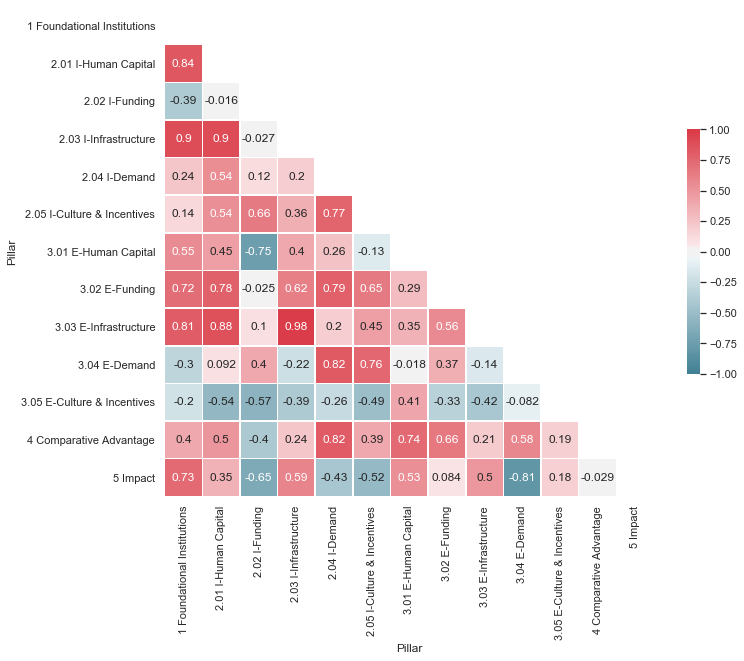

In [12]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
df_means = df_concat.groupby('Pillar').mean().T

In [14]:
import pingouin as pg

In [15]:
df_means.rcorr()

Pillar                      1 Foundational Institutions 2.01 I-Human Capital  \
Pillar                                                                         
1 Foundational Institutions                           -                    *   
2.01 I-Human Capital                               0.84                    -   
2.02 I-Funding                                   -0.388               -0.016   
2.03 I-Infrastructure                             0.896                0.903   
2.04 I-Demand                                     0.241                0.544   
2.05 I-Culture & Incentives                        0.14                0.537   
3.01 E-Human Capital                              0.555                0.451   
3.02 E-Funding                                    0.719                0.784   
3.03 E-Infrastructure                             0.806                0.881   
3.04 E-Demand                                    -0.303                0.092   
3.05 E-Culture & Incentives                      -0.202               -0.538   
4 Comparative Advantage                           0.399                0.502   
5 Impact                                          0.735                0.347   

Pillar                      2.02 I-Funding 2.03 I-Infrastructure  \
Pillar                                                             
1 Foundational Institutions                                    *   
2.01 I-Human Capital                                           *   
2.02 I-Funding                           -                         
2.03 I-Infrastructure               -0.027                     -   
2.04 I-Demand                        0.118                 0.201   
2.05 I-Culture & Incentives          0.655                 0.361   
3.01 E-Human Capital                -0.748                 0.401   
3.02 E-Funding                      -0.025                 0.622   
3.03 E-Infrastructure                0.105                 0.984   
3.04 E-Demand                        0.403                -0.219   
3.05 E-Culture & Incentives         -0.571                -0.394   
4 Comparative Advantage             -0.401                 0.241   
5 Impact                            -0.654                 0.594   

Pillar                      2.04 I-Demand 2.05 I-Culture & Incentives  \
Pillar                                                                  
1 Foundational Institutions                                             
2.01 I-Human Capital                                                    
2.02 I-Funding                                                          
2.03 I-Infrastructure                                                   
2.04 I-Demand                           -                               
2.05 I-Culture & Incentives          0.77                           -   
3.01 E-Human Capital                0.262                      -0.128   
3.02 E-Funding                       0.79                        0.65   
3.03 E-Infrastructure               0.201                       0.446   
3.04 E-Demand                       0.824                       0.756   
3.05 E-Culture & Incentives        -0.262                      -0.489   
4 Comparative Advantage             0.818                       0.393   
5 Impact                           -0.425                      -0.516   

Pillar                      3.01 E-Human Capital 3.02 E-Funding  \
Pillar                                                            
1 Foundational Institutions                                       
2.01 I-Human Capital                                              
2.02 I-Funding                                                    
2.03 I-Infrastructure                                             
2.04 I-Demand                                                     
2.05 I-Culture & Incentives                                       
3.01 E-Human Capital                           -                  
3.02 E-Funding                             0.294              -   
3.03 E-Infra

In [36]:
#@title significance cheking { display-mode: "form" }
def check_corr_significance(df,a,b):
  import scipy.stats as stats
  r = stats.pearsonr(df[a], df[b])
  print(f'Correlation between:  ' + a + '   and   ' + b)
  print('**********************************************')
  print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
  if r[1] < 0.05:
    print('*Statistically significant*')
    print('**********************************************')
    print('')

    sns.lmplot(x=b, y=a, data=df)
    return True, r[0]
  else:
    print('Not significant')
    print('**********************************************')
    print('')

    sns.lmplot(x=b, y=a, data=df)
    return False, 0
  

Correlation between:  4 Comparative Advantage   and   2.04 I-Demand
**********************************************
Pearson Correlation: 0.8184860452505838, p-value: 0.04643077486137577
*Statistically significant*
**********************************************



True

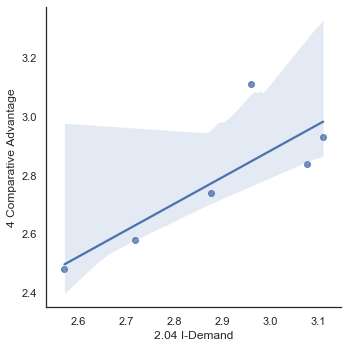

In [17]:
check_corr_significance(df_means,'4 Comparative Advantage','2.04 I-Demand')

In [18]:
#@title Función de spider plot
def make_spider_comparison(df,country_name1,country_name2):
  from math import pi
  categories=list(df)
  N = len(categories)
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  fig = plt.figure(figsize=(8, 8))
  # Initialise the spider plot
  ax = plt.subplot(111, polar=True)
  
  # If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories )
  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([1,2,3,4,5], ["1","2","3","4",""], color="grey", size=13)
  plt.ylim(0,5)
  
  
  # ------- PART 2: Add plots
  
  # Plot each individual = each line of the data
  # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
  
  # Ind1
  values=df.loc[country_name1].values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name1)
  ax.fill(angles, values, 'b', alpha=0.1)
  
  # Ind2
  values=df.loc[country_name2].values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name2)
  ax.fill(angles, values, 'r', alpha=0.1)
  
  # Add legend
  plt.legend( bbox_to_anchor=(0.05, 0.25))
  plt.tight_layout()

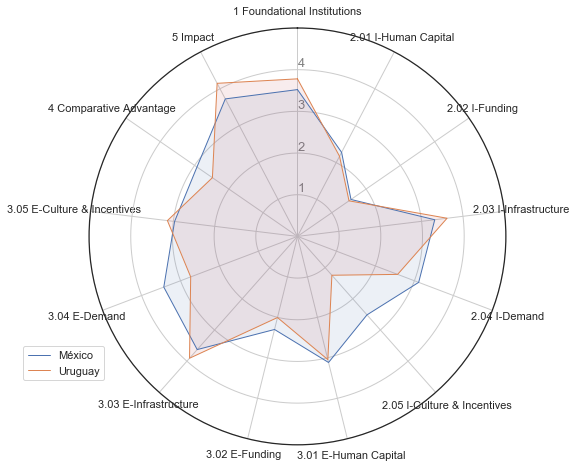

In [19]:
make_spider_comparison(df_means,'México','Uruguay')

In [20]:
#Graph_df = pd.read_csv('https://raw.githubusercontent.com/NunezKant/iGEDS/master/Graph_DF.csv')
Graph_df = pd.read_csv('https://raw.githubusercontent.com/OlgaMMC/iGED/master/Tidy_DataFrame.csv')
Graph_df

Ciudad       País  avg strength    weight    Degree  \
0               CABA  Argentina      3.244633  1.481579  4.385965   
1               CDMX     México      3.477388  1.388629  3.658863   
2  Santiago de Chile      Chile      3.417211  1.462564  3.948718   
3         Montevideo    Uruguay      3.227742  2.749495  7.747475   
4             Madrid     España      3.518387  1.362343  3.790795   
5          Sao Paulo     Brasil      3.430669  1.253704  3.370370   

   Weighted Degree  Eccentricidad  Clustering  Diámetro  Radio  \
0        14.017544       4.798246    0.148791         6      3   
1        12.963211       5.622074    0.075940         7      4   
2        13.764103       5.041026    0.134037         6      3   
3        25.939394       4.479798    0.207747         6      3   
4        12.861925       6.079498    0.120510         8      5   
5        11.694444       6.726852    0.129928         8      4   

   Camino más corto promedio  Transitividad  Eficiencia Global  \
0                   3.355669       0.107392           0.325773   
1                   3.820318       0.050000           0.289320   
2                   3.227544       0.100744           0.338889   
3                   3.081116       0.224523           0.360837   
4                   3.783517       0.081917           0.294653   
5                   4.324031       0.078571           0.266719   

   Small Worldness  Rich Club Coefficient  Core Ratio  \
0         0.960807               5.333333    0.495614   
1         0.677149               1.000000    0.421405   
2         0.906814              19.000000    0.430769   
3         1.274519              59.000000    0.565657   
4         1.141033              14.000000    0.439331   
5         1.211794               1.000000    0.421296   

   Central Point Dominance  Spectral radius  
0                    0.251            1.868  
1                    0.202            1.910  
2                    0.525            1.890  
3                    0.179            1.778  
4                    0.184            1.920  
5                    0.237            1.983

In [21]:
df_means.columns.name = ''
Graph_df.drop('Ciudad', axis = 1, inplace=True)
Graph_df.set_index('País',inplace=True)
Graph_df.index.name = ''

In [29]:
df_graph_ieco = pd.concat([df_means,Graph_df], axis = 1)
df_graph_ieco

1 Foundational Institutions  2.01 I-Human Capital  2.02 I-Funding  \
México                           3.522              2.278000          1.5600   
Argentina                        3.169              2.034667          1.7400   
Chile                            3.913              2.580667          1.2025   
Brasil                           3.177              1.828000          1.8400   
España                           3.929              2.992000          1.9500   
Uruguay                          3.780              2.171333          1.5025   

           2.03 I-Infrastructure  2.04 I-Demand  2.05 I-Culture & Incentives  \
México                    3.3175       3.110000                        2.515   
Argentina                 3.3100       2.716667                        1.795   
Chile                     3.6925       2.960000                        1.955   
Brasil                    3.2650       2.876667                        2.755   
España                    3.9525       3.076667                        3.830   
Uruguay                   3.6150       2.570000                        1.245   

           3.01 E-Human Capital  3.02 E-Funding  3.03 E-Infrastructure  \
México                    3.115        2.300000                 3.6275   
Argentina                 3.075        1.723333                 3.7125   
Chile                     4.155        2.206667                 3.9975   
Brasil                    2.975        1.991667                 3.6775   
España                    3.190        2.423333                 4.2925   
Uruguay                   3.045        2.005000                 3.9050   

           3.04 E-Demand  3.05 E-Culture & Incentives  \
México             3.430                     2.970000   
Argentina          3.175                     2.965000   
Chile              3.205                     3.455000   
Brasil             3.460                     3.438333   
España             3.365                     2.626667   
Uruguay            2.740                     3.143333   

           4 Comparative Advantage  5 Impact  avg strength    weight  \
México                        2.93  3.725455      3.477388  1.388629   
Argentina                     2.58  3.781818      3.244633  1.481579   
Chile                         3.11  4.091818      3.417211  1.462564   
Brasil                        2.74  3.671818      3.430669  1.253704   
España                        2.84  3.864545      3.518387  1.362343   
Uruguay                       2.48  4.147576      3.227742  2.749495   

             Degree  Weighted Degree  Eccentricidad  Clustering  Diámetro  \
México     3.658863        12.963211       5.622074    0.075940         7   
Argentina  4.385965        14.017544       4.798246    0.148791         6   
Chile      3.948718        13.764103       5.041026    0.134037         6   
Brasil     3.370370        11.694444       6.726852    0.129928         8   
España     3.790795        12.861925       6.079498    0.120510         8   
Uruguay    7.747475        25.939394       4.479798    0.207747         6   

           Radio  Camino más corto promedio  Transitividad  Eficiencia Global  \
México         4                   3.820318       0.050000           0.289320   
Argentina      3                   3.355669       0.107392           0.325773   
Chile          3                   3.227544       0.100744           0.338889   
Brasil         4                   4.324031       0.078571           0.266719   
España         5                   3.783517       0.081917           0.294653   
Uruguay        3                   3.081116       0.224523           0.360837   

           Small Worldness  Rich Club Coefficient  Core Ratio  \
México            0.677149               1.000000    0.421405   
Argentina         0.960807               5.333333    0.495614   
Chile             0.906814              19.000000    0.430769   
Brasil            1.211794               1.000000    0.421296   
España            1.141033      

In [30]:
ieco_global_corr_df=df_graph_ieco.corr()
pd.set_option("display.max_rows", None, "display.max_columns", None)
ieco_global_corr_df


1 Foundational Institutions  \
1 Foundational Institutions                     1.000000   
2.01 I-Human Capital                            0.840274   
2.02 I-Funding                                 -0.387851   
2.03 I-Infrastructure                           0.896183   
2.04 I-Demand                                   0.241385   
2.05 I-Culture & Incentives                     0.139546   
3.01 E-Human Capital                            0.554805   
3.02 E-Funding                                  0.719206   
3.03 E-Infrastructure                           0.805614   
3.04 E-Demand                                  -0.303465   
3.05 E-Culture & Incentives                    -0.202260   
4 Comparative Advantage                         0.398735   
5 Impact                                        0.734565   
avg strength                                    0.282043   
weight                                          0.308403   
Degree                                          0.270243   
Weighted Degree                                 0.310834   
Eccentricidad                                  -0.248765   
Clustering                                      0.119891   
Diámetro                                       -0.101749   
Radio                                           0.161879   
Camino más corto promedio                      -0.455479   
Transitividad                                   0.256974   
Eficiencia Global                               0.434262   
Small Worldness                                 0.057238   
Rich Club Coefficient                           0.526316   
Core Ratio                                      0.073141   
Central Point Dominance                         0.269750   
Spectral radius                                -0.351757   

                             2.01 I-Human Capital  2.02 I-Funding  \
1 Foundational Institutions              0.840274       -0.387851   
2.01 I-Human Capital                     1.000000       -0.016269   
2.02 I-Funding                          -0.016269        1.000000   
2.03 I-Infrastructure                    0.903394       -0.027129   
2.04 I-Demand                            0.543974        0.118169   
2.05 I-Culture & Incentives              0.536930        0.655465   
3.01 E-Human Capital                     0.450810       -0.747778   
3.02 E-Funding                           0.784386       -0.024527   
3.03 E-Infrastructure                    0.881426        0.104712   
3.04 E-Demand                            0.092240        0.403245   
3.05 E-Culture & Incentives             -0.537658       -0.570975   
4 Comparative Advantage                  0.502177       -0.400578   
5 Impact                                 0.346690       -0.654334   
avg strength                             0.534109        0.223853   
weight                                  -0.130836       -0.311220   
Degree                                  -0.141129       -0.270942   
Weighted Degree                         -0.125112       -0.308998   
Eccentricidad                            0.006499        0.599906   
Clustering                              -0.220874       -0.154678   
Diámetro                                 0.169760        0.738507   
Radio                                    0.490421        0.700507   
Camino más corto promedio               -0.199446        0.631247   
Transitividad                           -0.155289       -0.271756   
Eficiencia Global                        0.101512       -0.628286   
Small Worldness                         -0.104863        0.373340   
Rich Club Coefficient                    0.089858       -0.360532   
Core Ratio                              -0.221589       -0.117499   
Central Point Dominance                  0.169749       -0.729078   
Spectral radius                         -0.024491        0.433691   

                             2.03 I-Infrastructure  2.04 I-Demand  \
1 Foundational Institutions               0.896183       0.241385   
2.01 I-Human Capita

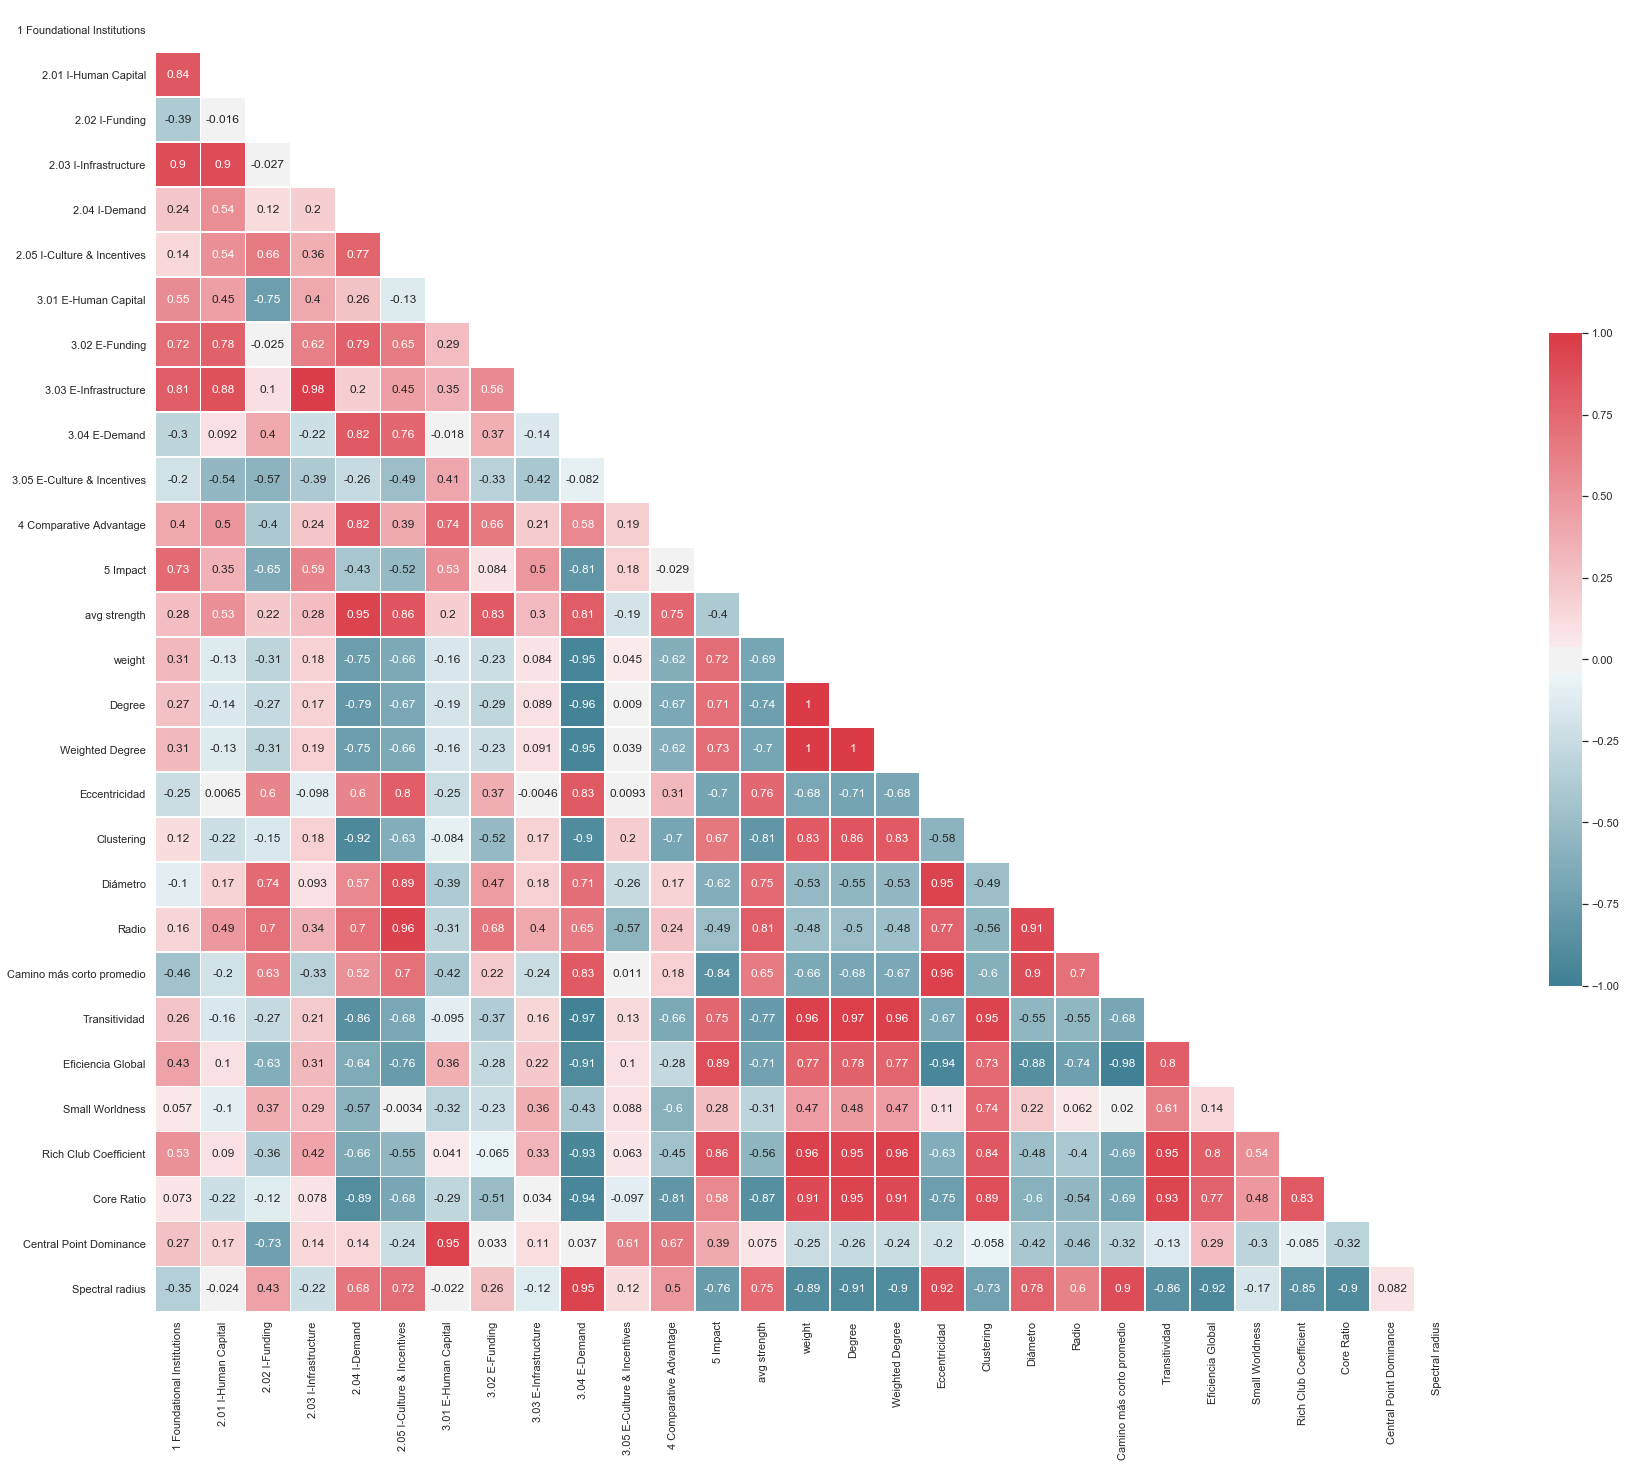

In [31]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(ieco_global_corr_df, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(32, 24))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ieco_global_corr_df, mask=mask, cmap=cmap, annot=True, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation between:  1 Foundational Institutions   and   avg strength
**********************************************
Pearson Correlation: 0.282043373730671, p-value: 0.5881529980786528
Not significant
**********************************************

Correlation between:  1 Foundational Institutions   and   weight
**********************************************
Pearson Correlation: 0.3084033697998984, p-value: 0.5520614744127386
Not significant
**********************************************

Correlation between:  1 Foundational Institutions   and   Degree
**********************************************
Pearson Correlation: 0.2702432921879119, p-value: 0.6045031896984716
Not significant
**********************************************

Correlation between:  1 Foundational Institutions   and   Weighted Degree
**********************************************
Pearson Correlation: 0.31083391289738205, p-value: 0.5487651628540254
Not significant
**********************************************

Corre

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Clustering
**********************************************
Pearson Correlation: -0.2208739270126756, p-value: 0.6740768089528169
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Diámetro
**********************************************
Pearson Correlation: 0.1697601052855031, p-value: 0.7478059573040848
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Radio
**********************************************
Pearson Correlation: 0.4904207256471201, p-value: 0.3233450660107681
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.19944574164586137, p-value: 0.7047982241055217
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Transitividad
**********************************************
Pearson Correlation: -0.15528882595757676, p-value: 0.7689391265363789
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.10151181487438593, p-value: 0.8482552994768594
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Small Worldness
**********************************************
Pearson Correlation: -0.10486301252289333, p-value: 0.8432820312395494
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Rich Club Coefficient
**********************************************
Pearson Correlation: 0.08985763603213481, p-value: 0.865576318964258
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Core Ratio
**********************************************
Pearson Correlation: -0.2215894779291998, p-value: 0.6730560149369494
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.16974944740039283, p-value: 0.7478214834443876
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.01 I-Human Capital   and   Spectral radius
**********************************************
Pearson Correlation: -0.02449078177350897, p-value: 0.9632711721054983
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   avg strength
**********************************************
Pearson Correlation: 0.22385277929097466, p-value: 0.6698294699249414
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   weight
**********************************************
Pearson Correlation: -0.31121989238712966, p-value: 0.5482422017985019
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Degree
**********************************************
Pearson Correlation: -0.2709418576975854, p-value: 0.6035320652844606
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Weighted Degree
**********************************************
Pearson Correlation: -0.3089983196024768, p-value: 0.5512540944285398
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Eccentricidad
**********************************************
Pearson Correlation: 0.599905990665631, p-value: 0.2080902569145583
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Clustering
**********************************************
Pearson Correlation: -0.15467757274572846, p-value: 0.7698339830630171
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Diámetro
**********************************************
Pearson Correlation: 0.7385065695777545, p-value: 0.09362791589032411
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Radio
**********************************************
Pearson Correlation: 0.7005067480885, p-value: 0.12111260741066879
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Camino más corto promedio
**********************************************
Pearson Correlation: 0.6312466686277385, p-value: 0.17889717089731247
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Transitividad
**********************************************
Pearson Correlation: -0.27175552656129864, p-value: 0.6024014278514558
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Eficiencia Global
**********************************************
Pearson Correlation: -0.6282860173040314, p-value: 0.1815768280894576
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Small Worldness
**********************************************
Pearson Correlation: 0.3733395266914752, p-value: 0.46600918999419505
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Rich Club Coefficient
**********************************************
Pearson Correlation: -0.3605317877702118, p-value: 0.4826338506734514
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Core Ratio
**********************************************
Pearson Correlation: -0.11749923272862604, p-value: 0.8245622522049542
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Central Point Dominance
**********************************************
Pearson Correlation: -0.7290778219701586, p-value: 0.10015555484598163
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.02 I-Funding   and   Spectral radius
**********************************************
Pearson Correlation: 0.43369113081181476, p-value: 0.39024935182584425
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   avg strength
**********************************************
Pearson Correlation: 0.28445976842715354, p-value: 0.5848192140821199
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   weight
**********************************************
Pearson Correlation: 0.17964652140929419, p-value: 0.7334290725401882
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Degree
**********************************************
Pearson Correlation: 0.17393096066878547, p-value: 0.7417344368885075
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Weighted Degree
**********************************************
Pearson Correlation: 0.1859603278388917, p-value: 0.7242748779336152
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Eccentricidad
**********************************************
Pearson Correlation: -0.09840958897042251, p-value: 0.8528621377786104
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Clustering
**********************************************
Pearson Correlation: 0.18363892075712815, p-value: 0.7276380697768878
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Diámetro
**********************************************
Pearson Correlation: 0.09305885520343214, p-value: 0.8608146597361543
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Radio
**********************************************
Pearson Correlation: 0.3447356504512039, p-value: 0.5033811766696434
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.33378627331255784, p-value: 0.5179147011699929
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Transitividad
**********************************************
Pearson Correlation: 0.21494720981345108, p-value: 0.6825447133389343
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.3117475598246614, p-value: 0.5475274937741098
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Small Worldness
**********************************************
Pearson Correlation: 0.2927716084160143, p-value: 0.5733900780118949
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Rich Club Coefficient
**********************************************
Pearson Correlation: 0.42483476082872557, p-value: 0.4010859191729783
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Core Ratio
**********************************************
Pearson Correlation: 0.07815376958704852, p-value: 0.8830080276889716
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.13618035425896294, p-value: 0.796992206998692
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.03 I-Infrastructure   and   Spectral radius
**********************************************
Pearson Correlation: -0.22454069543098457, p-value: 0.668849462063598
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   avg strength
**********************************************
Pearson Correlation: 0.9521163141014182, p-value: 0.0033843760710865188
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   weight
**********************************************
Pearson Correlation: -0.7513026741395321, p-value: 0.08508453028112797
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Degree
**********************************************
Pearson Correlation: -0.7930354359599854, p-value: 0.05981890185570923
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Weighted Degree
**********************************************
Pearson Correlation: -0.7540324234088823, p-value: 0.08330954791577455
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Eccentricidad
**********************************************
Pearson Correlation: 0.599406547934242, p-value: 0.2085700308454441
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Clustering
**********************************************
Pearson Correlation: -0.9174944429171862, p-value: 0.00992993587365419
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Diámetro
**********************************************
Pearson Correlation: 0.5729735439932807, p-value: 0.23459291370030597
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Radio
**********************************************
Pearson Correlation: 0.6996691390452744, p-value: 0.12175322355467552
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Camino más corto promedio
**********************************************
Pearson Correlation: 0.5245724697849072, p-value: 0.2853162447011561
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Transitividad
**********************************************
Pearson Correlation: -0.859276309400167, p-value: 0.028311348968014967
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Eficiencia Global
**********************************************
Pearson Correlation: -0.6438384249216684, p-value: 0.1676868633317426
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Small Worldness
**********************************************
Pearson Correlation: -0.5720319885558817, p-value: 0.23554234125965895
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Rich Club Coefficient
**********************************************
Pearson Correlation: -0.6554758638583902, p-value: 0.15759835048766183
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Core Ratio
**********************************************
Pearson Correlation: -0.8870737503323284, p-value: 0.018408469951269373
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.14102851437630193, p-value: 0.7898596894489958
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.04 I-Demand   and   Spectral radius
**********************************************
Pearson Correlation: 0.6808168137337806, p-value: 0.13655800220593137
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   avg strength
**********************************************
Pearson Correlation: 0.8576669176387266, p-value: 0.02894631744307371
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   weight
**********************************************
Pearson Correlation: -0.6628819948350273, p-value: 0.15131633797672486
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Degree
**********************************************
Pearson Correlation: -0.6723173531372335, p-value: 0.14347126322753506
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Weighted Degree
**********************************************
Pearson Correlation: -0.6623942917180801, p-value: 0.151726674800774
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Eccentricidad
**********************************************
Pearson Correlation: 0.8042285278880069, p-value: 0.05373808928218256
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Clustering
**********************************************
Pearson Correlation: -0.6250677683665501, p-value: 0.18450837228312295
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Diámetro
**********************************************
Pearson Correlation: 0.8885028029536859, p-value: 0.017954391755494337
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Radio
**********************************************
Pearson Correlation: 0.9596725168103402, p-value: 0.0024066664386883847
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Camino más corto promedio
**********************************************
Pearson Correlation: 0.6972660941138702, p-value: 0.12359927573941697
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Transitividad
**********************************************
Pearson Correlation: -0.6761642120864156, p-value: 0.14032415868932127
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Eficiencia Global
**********************************************
Pearson Correlation: -0.7580202266991896, p-value: 0.08074684871617822
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Small Worldness
**********************************************
Pearson Correlation: -0.003378202341376535, p-value: 0.9949327157643817
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Rich Club Coefficient
**********************************************
Pearson Correlation: -0.5467839624855224, p-value: 0.2615607955082173
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Core Ratio
**********************************************
Pearson Correlation: -0.682121493427812, p-value: 0.1355098232230031
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Central Point Dominance
**********************************************
Pearson Correlation: -0.23864268184685908, p-value: 0.6488313669235025
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  2.05 I-Culture & Incentives   and   Spectral radius
**********************************************
Pearson Correlation: 0.7243085128542827, p-value: 0.1035316186497947
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   avg strength
**********************************************
Pearson Correlation: 0.1956065421099846, p-value: 0.7103323277009919
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   weight
**********************************************
Pearson Correlation: -0.1620892391484493, p-value: 0.7589954202011603
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Degree
**********************************************
Pearson Correlation: -0.18637572095473648, p-value: 0.7236733836430197
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Weighted Degree
**********************************************
Pearson Correlation: -0.1596171728101401, p-value: 0.762607575366244
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Eccentricidad
**********************************************
Pearson Correlation: -0.249371699176345, p-value: 0.633696195944972
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Clustering
**********************************************
Pearson Correlation: -0.08414611393181937, p-value: 0.8740787302636944
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Diámetro
**********************************************
Pearson Correlation: -0.38922994349848156, p-value: 0.44563924303054353
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Radio
**********************************************
Pearson Correlation: -0.3121572419905745, p-value: 0.5469727724338983
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.41508639403641395, p-value: 0.41312941991137964
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Transitividad
**********************************************
Pearson Correlation: -0.09466716798538724, p-value: 0.8584234455758304
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.36428510652056945, p-value: 0.47774331982306495
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Small Worldness
**********************************************
Pearson Correlation: -0.31895808169272094, p-value: 0.537787359328375
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Rich Club Coefficient
**********************************************
Pearson Correlation: 0.04098080001481122, p-value: 0.9385632120876882
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Core Ratio
**********************************************
Pearson Correlation: -0.2912014484382057, p-value: 0.5755445188433855
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.9458097209373085, p-value: 0.004325312300577863
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.01 E-Human Capital   and   Spectral radius
**********************************************
Pearson Correlation: -0.022217063972385737, p-value: 0.9666798871898322
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   avg strength
**********************************************
Pearson Correlation: 0.83396874419741, p-value: 0.03906112668446374
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   weight
**********************************************
Pearson Correlation: -0.22849284567472233, p-value: 0.6632254207528298
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Degree
**********************************************
Pearson Correlation: -0.2905318601932837, p-value: 0.5764639269994226
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Weighted Degree
**********************************************
Pearson Correlation: -0.23125819218761495, p-value: 0.6592965964159694
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Eccentricidad
**********************************************
Pearson Correlation: 0.3680281300534823, p-value: 0.4728815355831295
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Clustering
**********************************************
Pearson Correlation: -0.5215327324990132, p-value: 0.2886284117832329
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Diámetro
**********************************************
Pearson Correlation: 0.4744472233654329, p-value: 0.3417282397380661
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Radio
**********************************************
Pearson Correlation: 0.6846010681910782, p-value: 0.1335273405376957
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Camino más corto promedio
**********************************************
Pearson Correlation: 0.2166155776979121, p-value: 0.6801586849346071
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Transitividad
**********************************************
Pearson Correlation: -0.37007145036229977, p-value: 0.47023399962199164
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Eficiencia Global
**********************************************
Pearson Correlation: -0.27632781761407044, p-value: 0.5960580638386196
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Small Worldness
**********************************************
Pearson Correlation: -0.2292493515778995, p-value: 0.6621501028675756
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Rich Club Coefficient
**********************************************
Pearson Correlation: -0.064698716716201, p-value: 0.9030873368794461
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Core Ratio
**********************************************
Pearson Correlation: -0.5066783292722379, p-value: 0.30502047855714987
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.03327852305598296, p-value: 0.9501006427342079
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.02 E-Funding   and   Spectral radius
**********************************************
Pearson Correlation: 0.26296666100425525, p-value: 0.6146422733945859
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   avg strength
**********************************************
Pearson Correlation: 0.29996377858108564, p-value: 0.5635494428271905
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   weight
**********************************************
Pearson Correlation: 0.08356973235360741, p-value: 0.8749372228034028
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Degree
**********************************************
Pearson Correlation: 0.08901438301033232, p-value: 0.8668310809038577
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Weighted Degree
**********************************************
Pearson Correlation: 0.09088845631297005, p-value: 0.8640427171882747
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Eccentricidad
**********************************************
Pearson Correlation: -0.004642827135460173, p-value: 0.9930358093368381
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Clustering
**********************************************
Pearson Correlation: 0.17484174551220044, p-value: 0.7404098059883611
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Diámetro
**********************************************
Pearson Correlation: 0.18086397317030772, p-value: 0.731662231204474
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Radio
**********************************************
Pearson Correlation: 0.4039439620616582, p-value: 0.4270399713781998
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.24425077889442548, p-value: 0.6409096422423951
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Transitividad
**********************************************
Pearson Correlation: 0.15601037537404056, p-value: 0.7678830237067835
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.22327134982949493, p-value: 0.670658024328733
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Small Worldness
**********************************************
Pearson Correlation: 0.36003708576835725, p-value: 0.4832795815635495
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Rich Club Coefficient
**********************************************
Pearson Correlation: 0.3339432748936212, p-value: 0.5177054492326127
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Core Ratio
**********************************************
Pearson Correlation: 0.03381224946691031, p-value: 0.9493009540346645
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.11345652566385861, p-value: 0.8305454394425462
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.03 E-Infrastructure   and   Spectral radius
**********************************************
Pearson Correlation: -0.12338452570194541, p-value: 0.8158623984896999
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   avg strength
**********************************************
Pearson Correlation: 0.8088411132847813, p-value: 0.05131994270122123
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   weight
**********************************************
Pearson Correlation: -0.9463687283104187, p-value: 0.004237339784452628
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Degree
**********************************************
Pearson Correlation: -0.9626246701606463, p-value: 0.002069267836215682
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Weighted Degree
**********************************************
Pearson Correlation: -0.9496417749365054, p-value: 0.003740073255955904
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Eccentricidad
**********************************************
Pearson Correlation: 0.8281029252267336, p-value: 0.04178324715066623
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Clustering
**********************************************
Pearson Correlation: -0.8980342032527658, p-value: 0.01506546515644111
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Diámetro
**********************************************
Pearson Correlation: 0.7132895141074862, p-value: 0.1115201369906655
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Radio
**********************************************
Pearson Correlation: 0.6466758978930478, p-value: 0.1652027584985039
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Camino más corto promedio
**********************************************
Pearson Correlation: 0.8298911750732905, p-value: 0.04094429789577112
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Transitividad
**********************************************
Pearson Correlation: -0.9712565321782046, p-value: 0.0012274066747367239
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Eficiencia Global
**********************************************
Pearson Correlation: -0.912144555017792, p-value: 0.011238809213837436
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Small Worldness
**********************************************
Pearson Correlation: -0.4257077535934603, p-value: 0.4000132586097074
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Rich Club Coefficient
**********************************************
Pearson Correlation: -0.9299910736282685, p-value: 0.007180309040384791
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Core Ratio
**********************************************
Pearson Correlation: -0.9413661463985242, p-value: 0.005056103675610325
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.036675421731366065, p-value: 0.9450115332113623
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.04 E-Demand   and   Spectral radius
**********************************************
Pearson Correlation: 0.9475504861581765, p-value: 0.004054284218917897
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   avg strength
**********************************************
Pearson Correlation: -0.187665584413653, p-value: 0.7218062615212223
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   weight
**********************************************
Pearson Correlation: 0.04484544873687535, p-value: 0.9327769215556907
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Degree
**********************************************
Pearson Correlation: 0.00897941525004043, p-value: 0.9865312391296084
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Weighted Degree
**********************************************
Pearson Correlation: 0.03877340578112973, p-value: 0.9418690368514566
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Eccentricidad
**********************************************
Pearson Correlation: 0.009273161065071228, p-value: 0.9860906571089828
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Clustering
**********************************************
Pearson Correlation: 0.20274114059868437, p-value: 0.7000550219916911
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Diámetro
**********************************************
Pearson Correlation: -0.2560193069393741, p-value: 0.6243615456834497
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Radio
**********************************************
Pearson Correlation: -0.5701718030549432, p-value: 0.23742254887537495
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Camino más corto promedio
**********************************************
Pearson Correlation: 0.010536795190823216, p-value: 0.9841953921326186
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Transitividad
**********************************************
Pearson Correlation: 0.12946873967141054, p-value: 0.8068819780049035
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.10151353355841385, p-value: 0.8482527480169193
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Small Worldness
**********************************************
Pearson Correlation: 0.08768438671717, p-value: 0.8688105028933825
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Rich Club Coefficient
**********************************************
Pearson Correlation: 0.06283689454001379, p-value: 0.9058687131534742
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Core Ratio
**********************************************
Pearson Correlation: -0.0973003593032885, p-value: 0.8545100498060287
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.6122809964213417, p-value: 0.19634691014888525
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  3.05 E-Culture & Incentives   and   Spectral radius
**********************************************
Pearson Correlation: 0.11912422106461328, p-value: 0.8221588893001932
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   avg strength
**********************************************
Pearson Correlation: 0.7546943496725864, p-value: 0.08288167628557114
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   weight
**********************************************
Pearson Correlation: -0.6154286630397586, p-value: 0.1934045591082865
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Degree
**********************************************
Pearson Correlation: -0.66628782957837, p-value: 0.14846398921208334
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Weighted Degree
**********************************************
Pearson Correlation: -0.6177231976016753, p-value: 0.1912712143944555
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Eccentricidad
**********************************************
Pearson Correlation: 0.3056189425428559, p-value: 0.5558444397629613
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Clustering
**********************************************
Pearson Correlation: -0.6951563696558851, p-value: 0.12522995418829164
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Diámetro
**********************************************
Pearson Correlation: 0.16737868620527577, p-value: 0.7512765799111195
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Radio
**********************************************
Pearson Correlation: 0.24398233920811016, p-value: 0.6412883061226298
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Camino más corto promedio
**********************************************
Pearson Correlation: 0.1807421539614863, p-value: 0.7318389866586611
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Transitividad
**********************************************
Pearson Correlation: -0.6588645994623239, p-value: 0.1547105056063918
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Eficiencia Global
**********************************************
Pearson Correlation: -0.27547069929515017, p-value: 0.5972458749533155
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Small Worldness
**********************************************
Pearson Correlation: -0.5958244139238369, p-value: 0.21202421819853273
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Rich Club Coefficient
**********************************************
Pearson Correlation: -0.45422066016571144, p-value: 0.3655255973013873
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Core Ratio
**********************************************
Pearson Correlation: -0.8092797354552281, p-value: 0.051092678597523346
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.6665465578459969, p-value: 0.14824825325730204
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  4 Comparative Advantage   and   Spectral radius
**********************************************
Pearson Correlation: 0.4994654381767627, p-value: 0.3131015962920219
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   avg strength
**********************************************
Pearson Correlation: -0.39574180717690666, p-value: 0.4373761636755538
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   weight
**********************************************
Pearson Correlation: 0.7219779787302387, p-value: 0.10519933742644325
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Degree
**********************************************
Pearson Correlation: 0.7089407238278236, p-value: 0.11474463698668406
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Weighted Degree
**********************************************
Pearson Correlation: 0.7254106445150381, p-value: 0.10274704668083949
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Eccentricidad
**********************************************
Pearson Correlation: -0.7011349839363727, p-value: 0.12063309061767412
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Clustering
**********************************************
Pearson Correlation: 0.6709264550874556, p-value: 0.14461650891017602
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Diámetro
**********************************************
Pearson Correlation: -0.6248091498278942, p-value: 0.18474479562926616
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Radio
**********************************************
Pearson Correlation: -0.4925677237551017, p-value: 0.3209025345483949
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.8363679868760034, p-value: 0.03797249435403064
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Transitividad
**********************************************
Pearson Correlation: 0.754530310477201, p-value: 0.08298761941588023
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.8863871378854795, p-value: 0.018628572922978447
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Small Worldness
**********************************************
Pearson Correlation: 0.2779670072096816, p-value: 0.5937881409171638
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Rich Club Coefficient
**********************************************
Pearson Correlation: 0.8614038002489668, p-value: 0.02748221915108597
*Statistically significant*
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Core Ratio
**********************************************
Pearson Correlation: 0.579523691371604, p-value: 0.2280303149314966
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Central Point Dominance
**********************************************
Pearson Correlation: 0.38845320835561037, p-value: 0.44662818475268645
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Correlation between:  5 Impact   and   Spectral radius
**********************************************
Pearson Correlation: -0.7608863556623298, p-value: 0.0789273010145706
Not significant
**********************************************



/Users/olga/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


[('2.04 I-Demand', 'avg strength'),
 ('2.04 I-Demand', 'Clustering'),
 ('2.04 I-Demand', 'Transitividad'),
 ('2.04 I-Demand', 'Core Ratio'),
 ('2.05 I-Culture & Incentives', 'avg strength'),
 ('2.05 I-Culture & Incentives', 'Diámetro'),
 ('2.05 I-Culture & Incentives', 'Radio'),
 ('3.01 E-Human Capital', 'Central Point Dominance'),
 ('3.02 E-Funding', 'avg strength'),
 ('3.04 E-Demand', 'weight'),
 ('3.04 E-Demand', 'Degree'),
 ('3.04 E-Demand', 'Weighted Degree'),
 ('3.04 E-Demand', 'Eccentricidad'),
 ('3.04 E-Demand', 'Clustering'),
 ('3.04 E-Demand', 'Camino más corto promedio'),
 ('3.04 E-Demand', 'Transitividad'),
 ('3.04 E-Demand', 'Eficiencia Global'),
 ('3.04 E-Demand', 'Rich Club Coefficient'),
 ('3.04 E-Demand', 'Core Ratio'),
 ('3.04 E-Demand', 'Spectral radius'),
 ('5 Impact', 'Camino más corto promedio'),
 ('5 Impact', 'Eficiencia Global'),
 ('5 Impact', 'Rich Club Coefficient')]

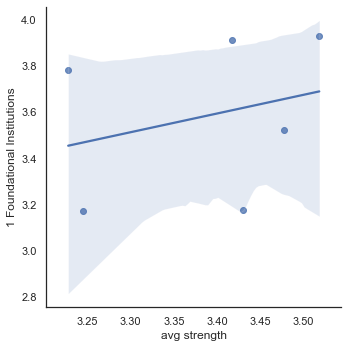

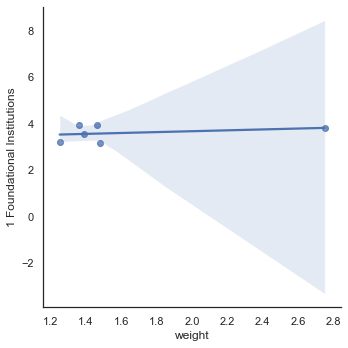

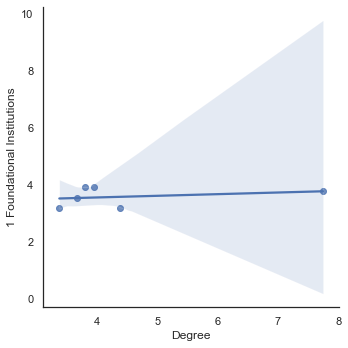

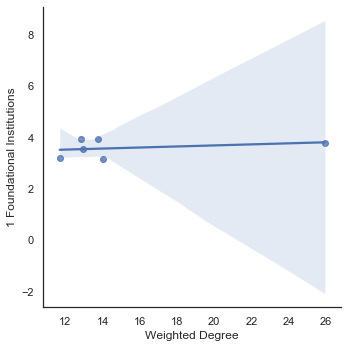

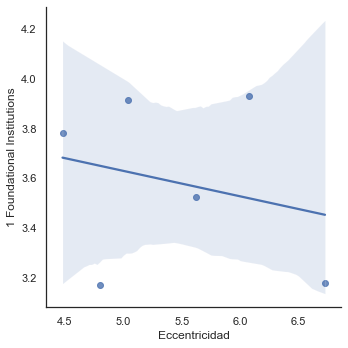

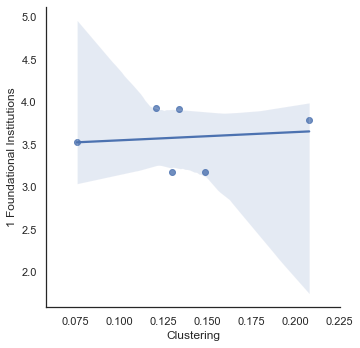

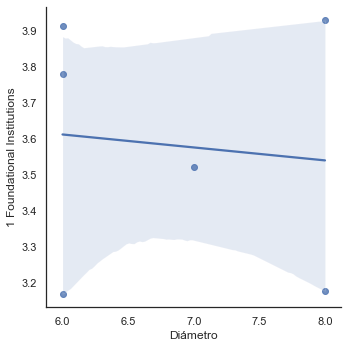

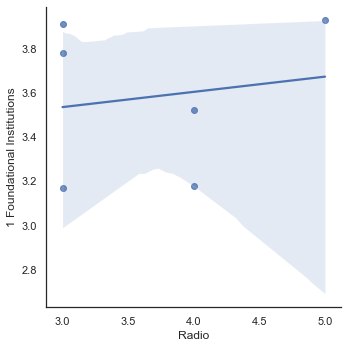

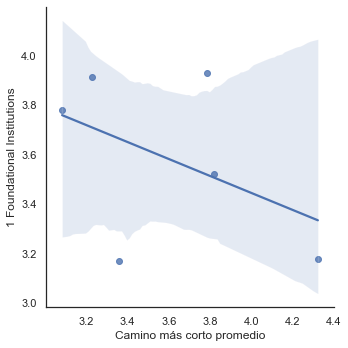

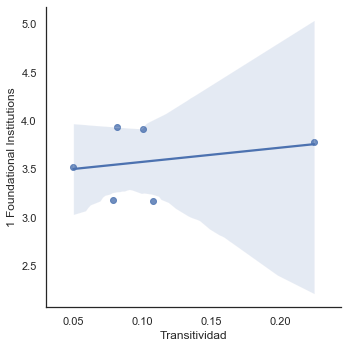

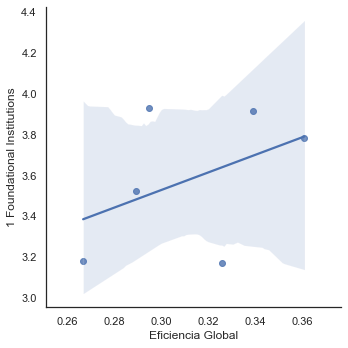

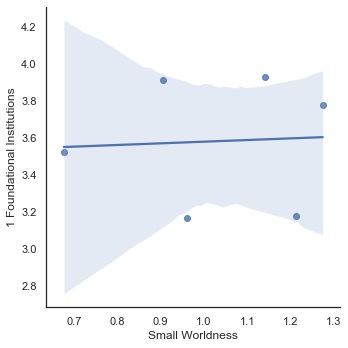

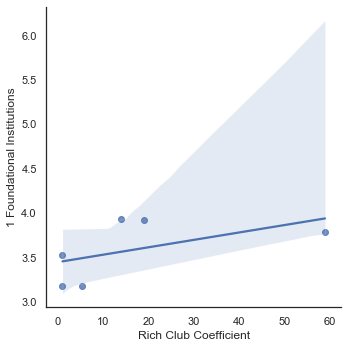

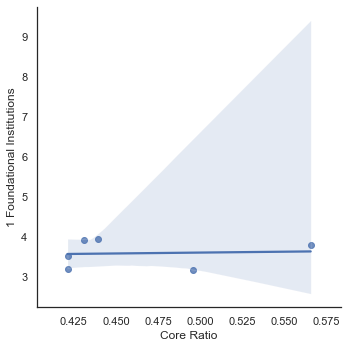

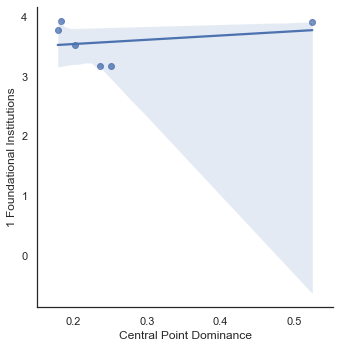

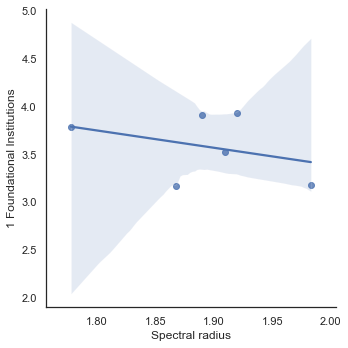

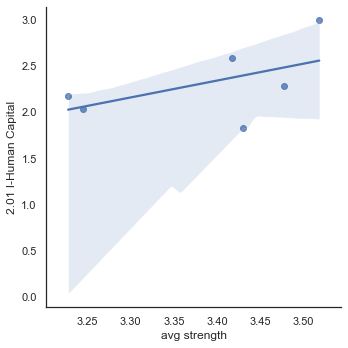

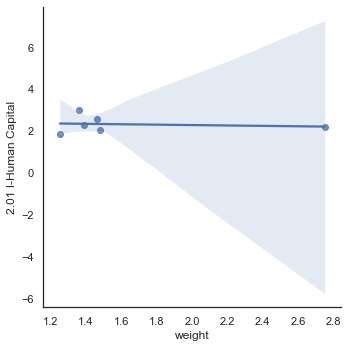

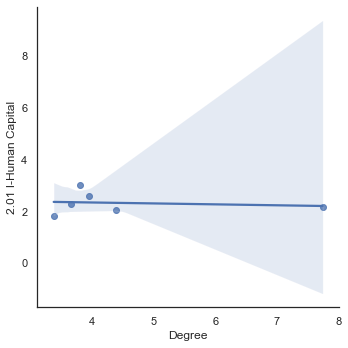

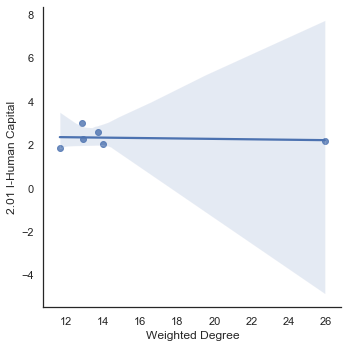

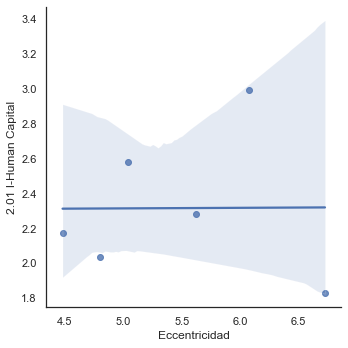

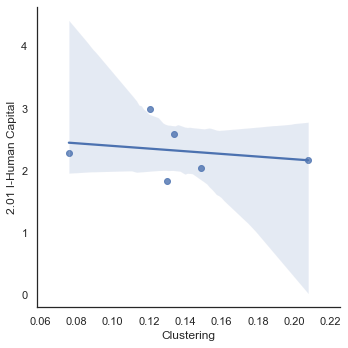

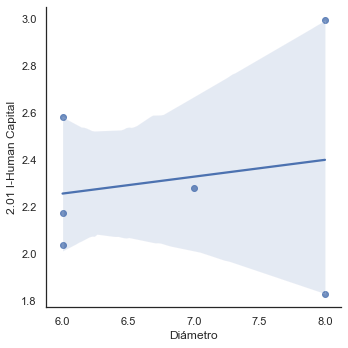

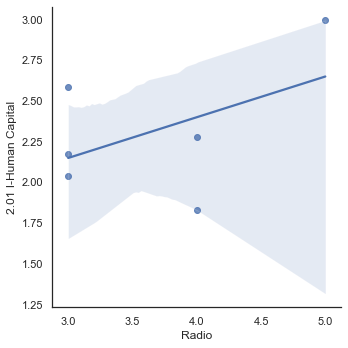

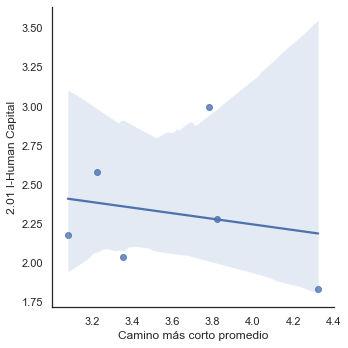

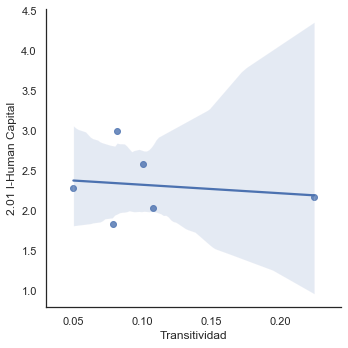

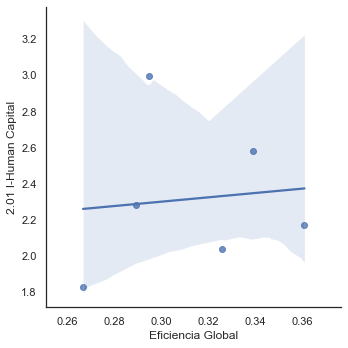

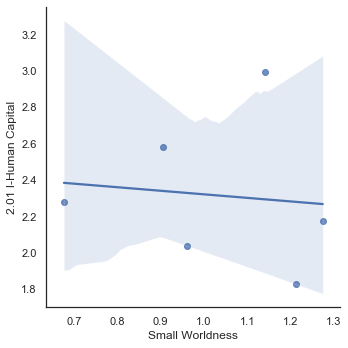

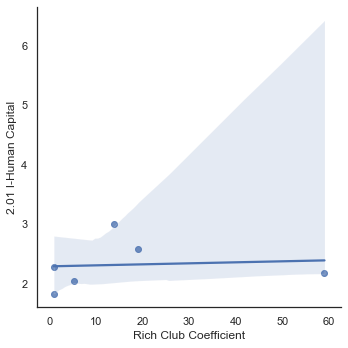

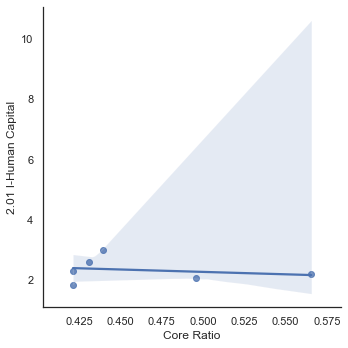

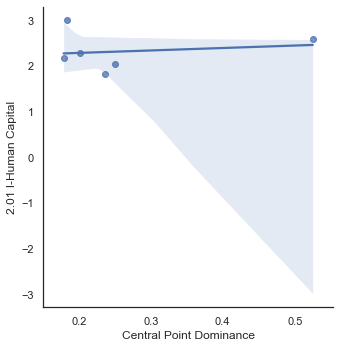

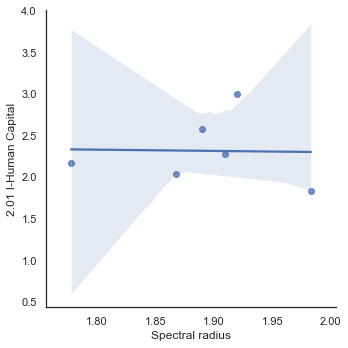

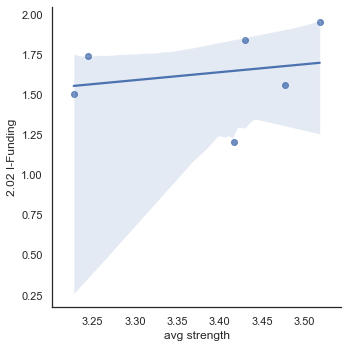

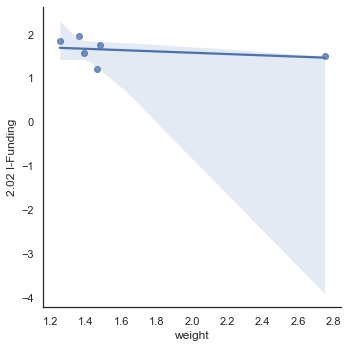

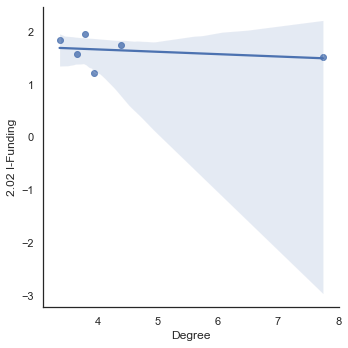

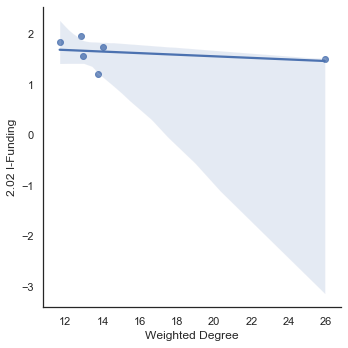

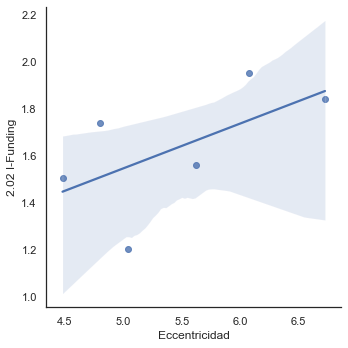

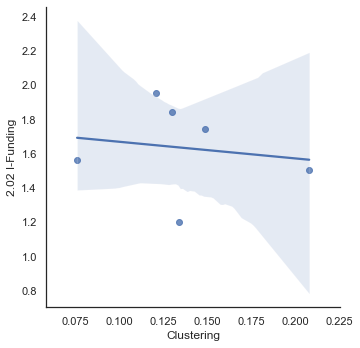

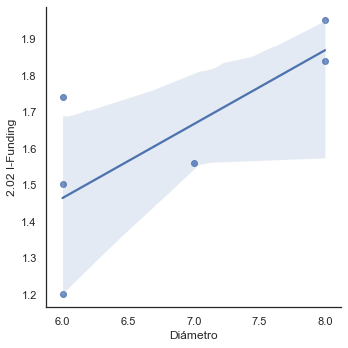

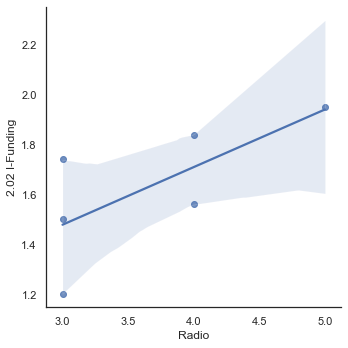

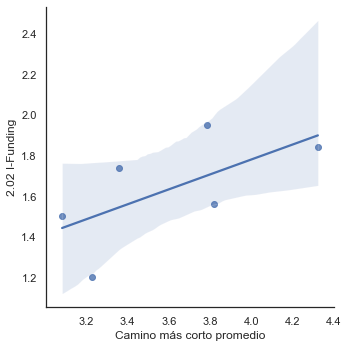

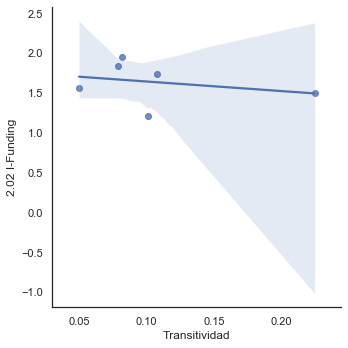

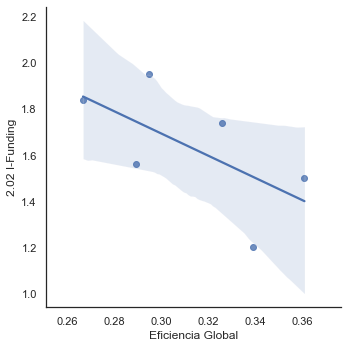

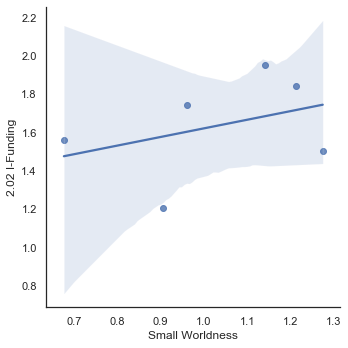

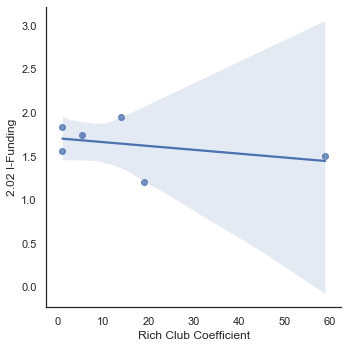

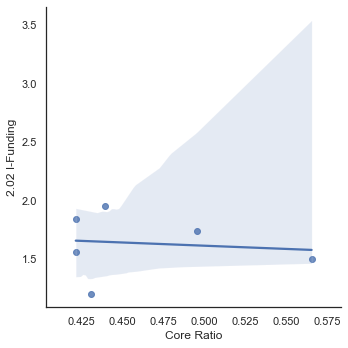

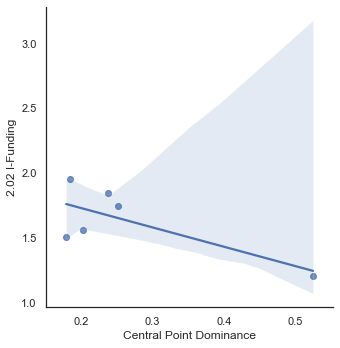

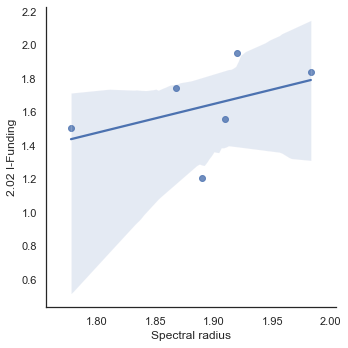

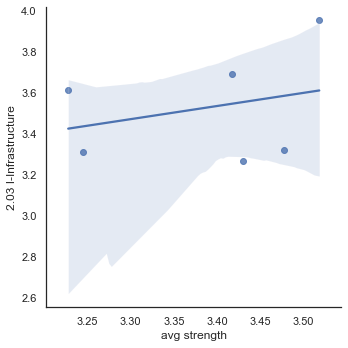

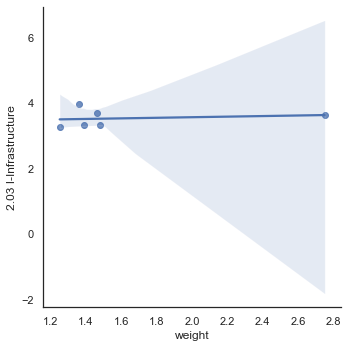

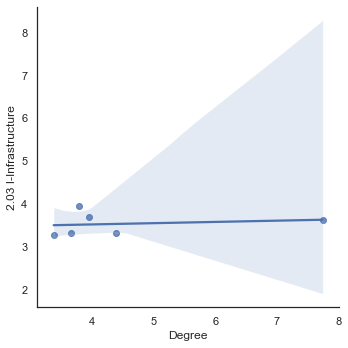

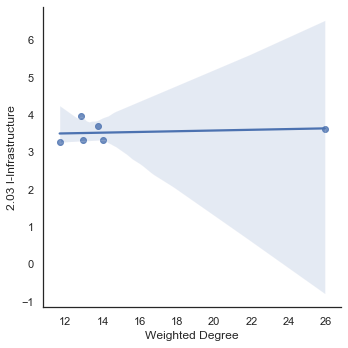

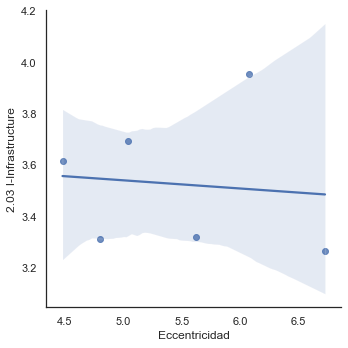

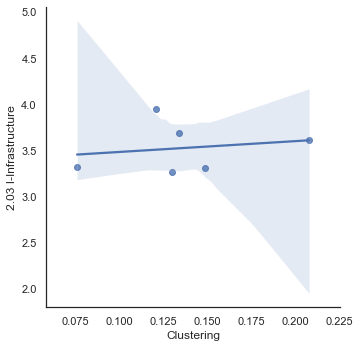

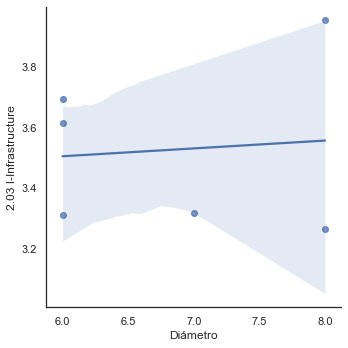

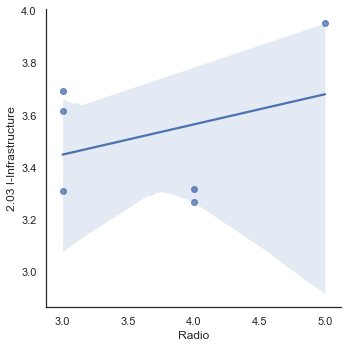

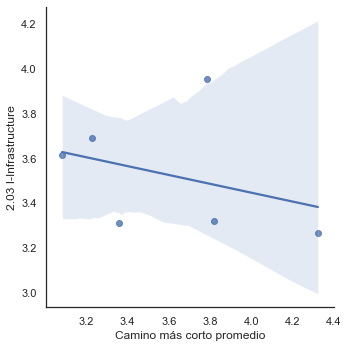

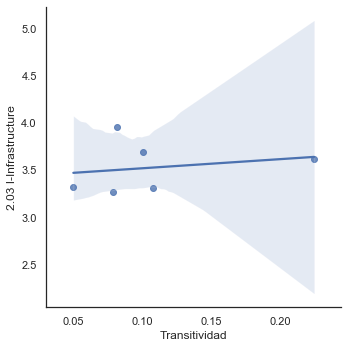

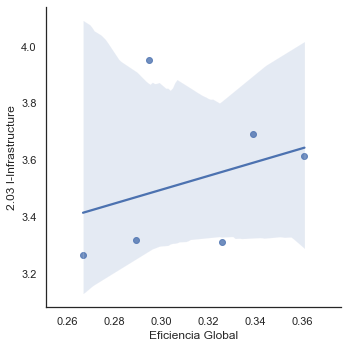

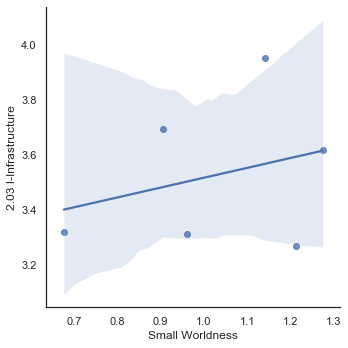

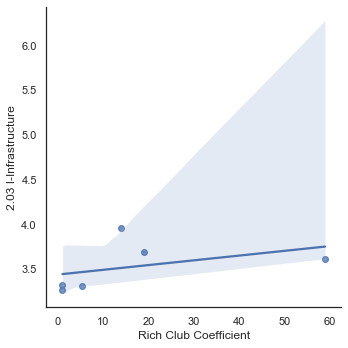

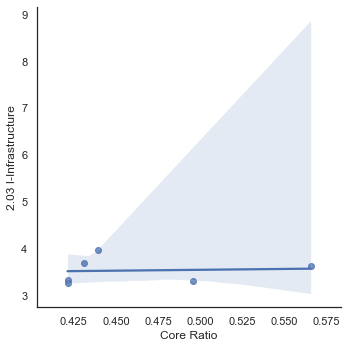

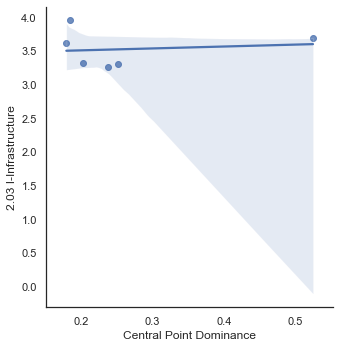

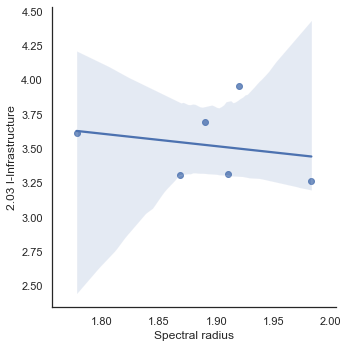

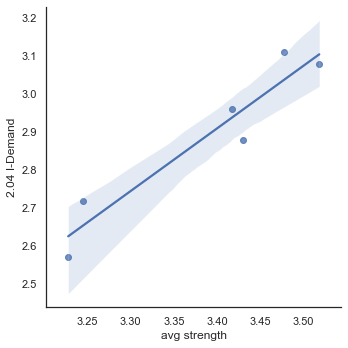

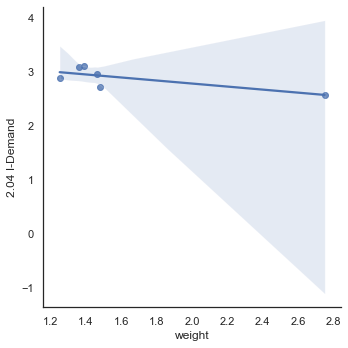

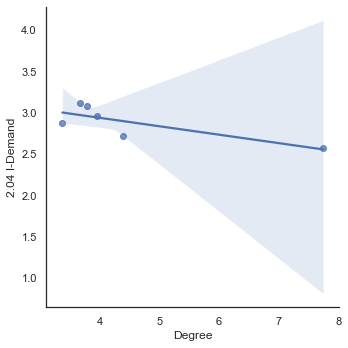

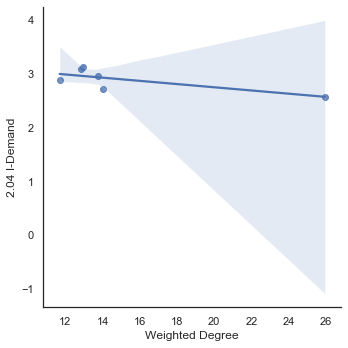

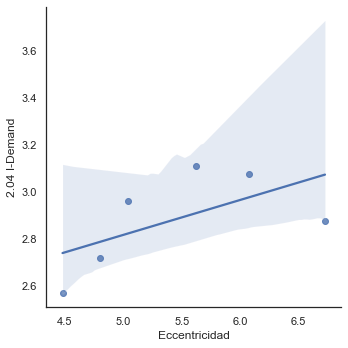

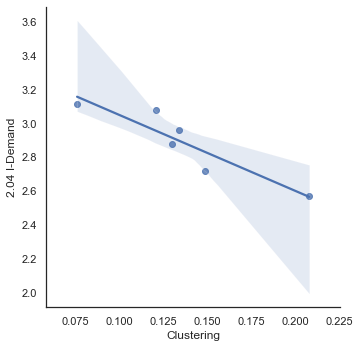

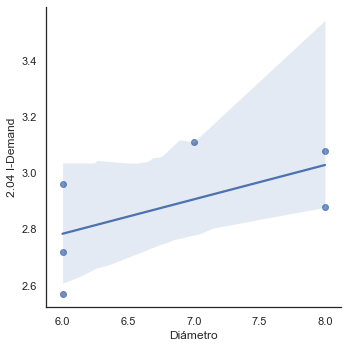

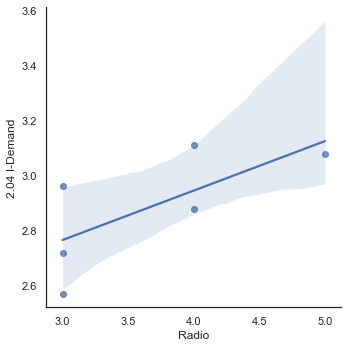

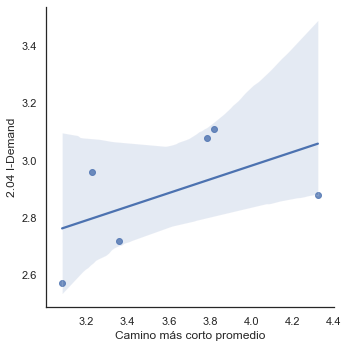

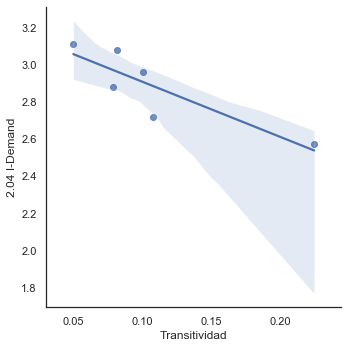

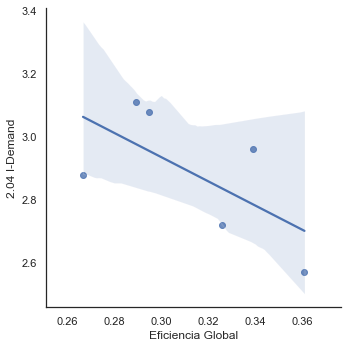

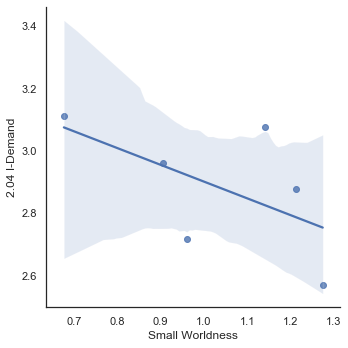

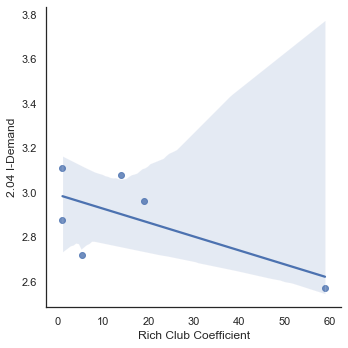

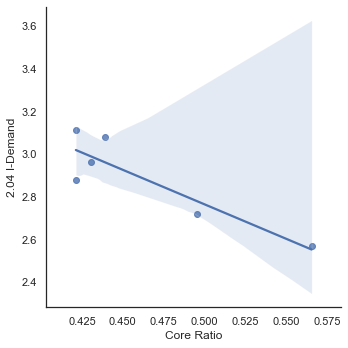

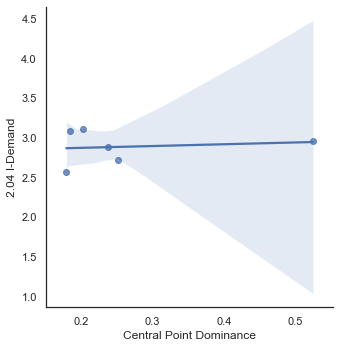

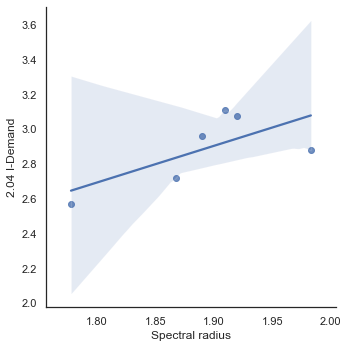

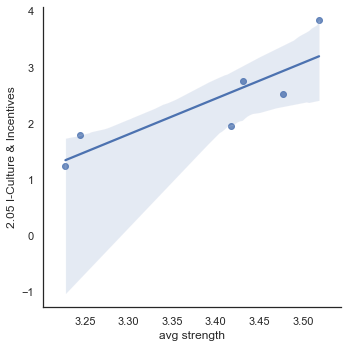

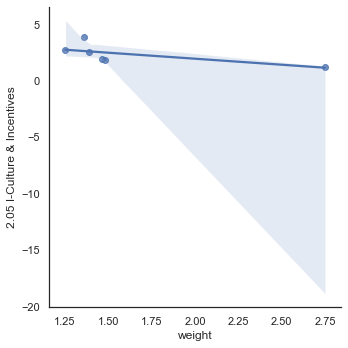

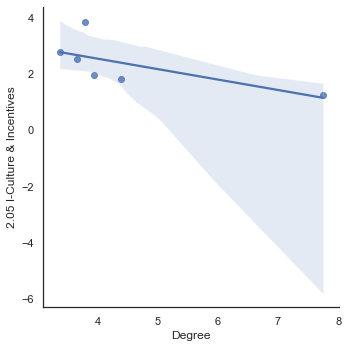

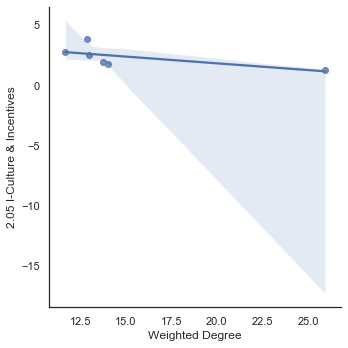

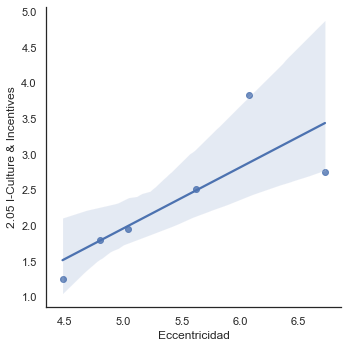

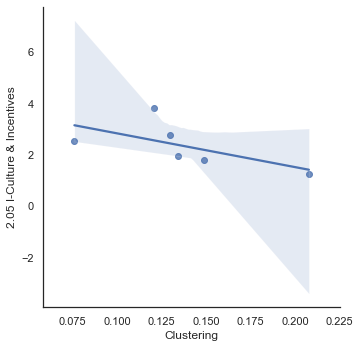

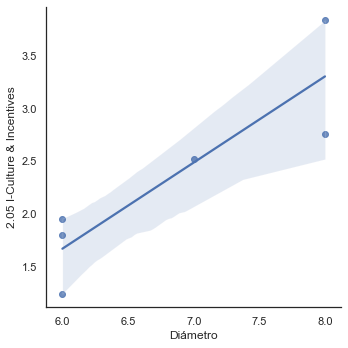

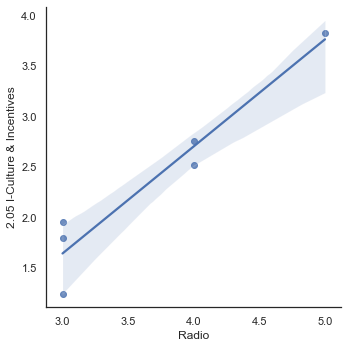

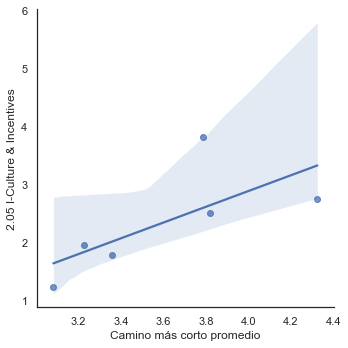

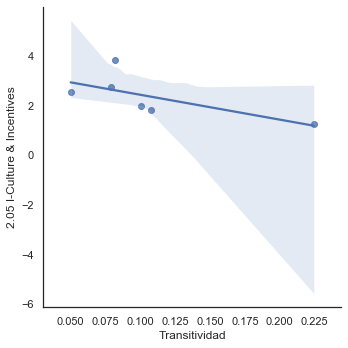

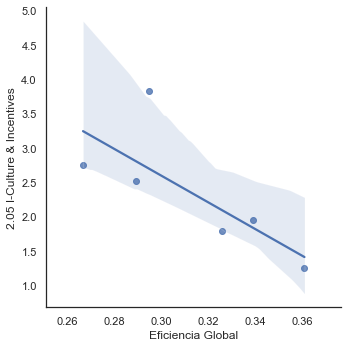

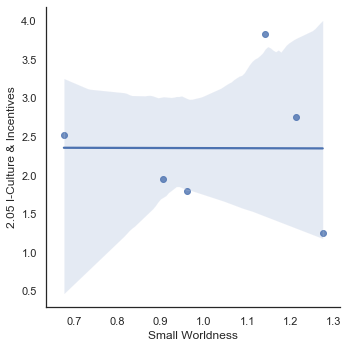

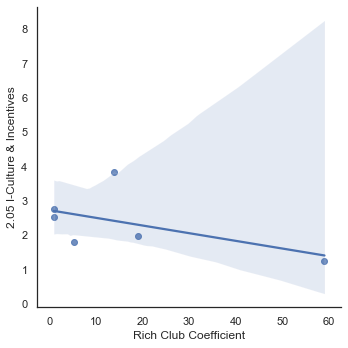

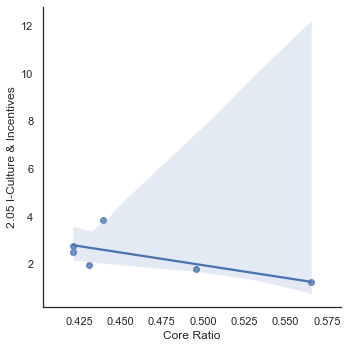

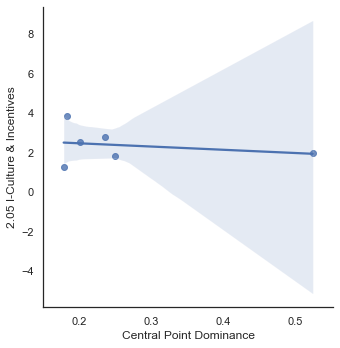

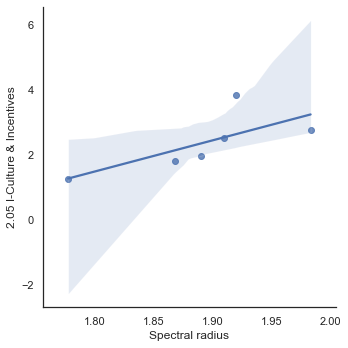

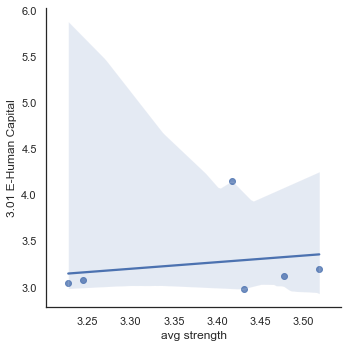

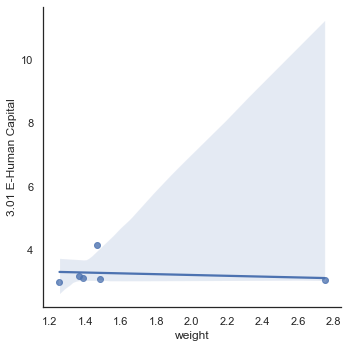

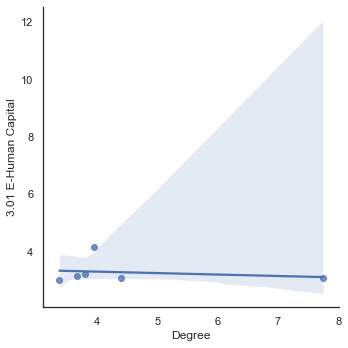

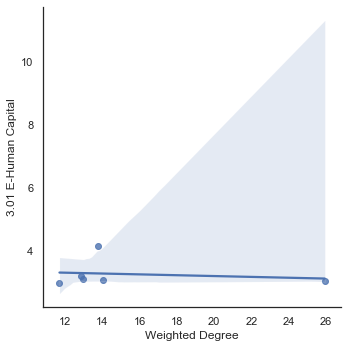

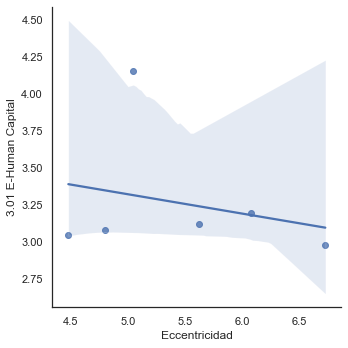

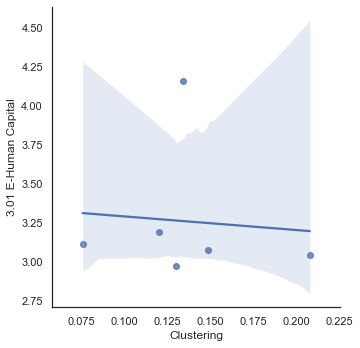

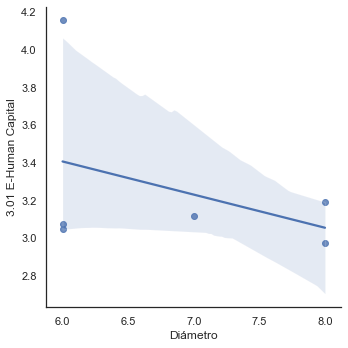

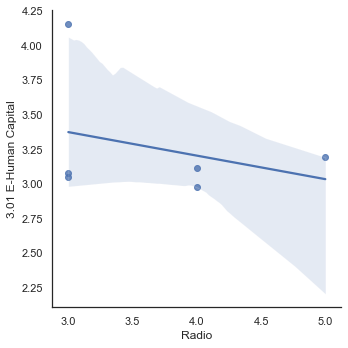

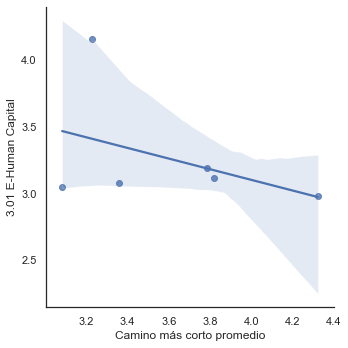

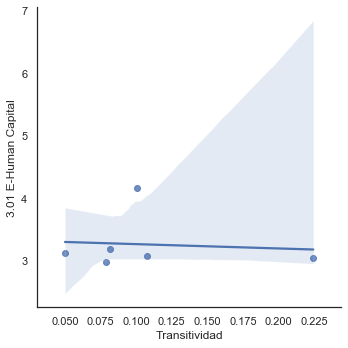

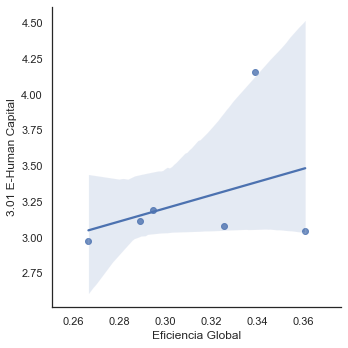

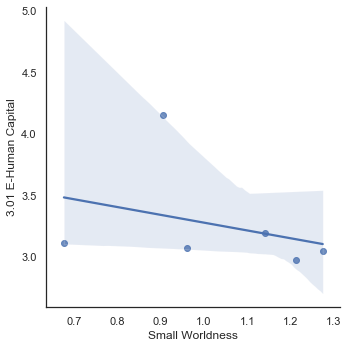

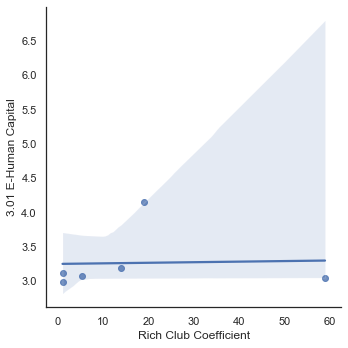

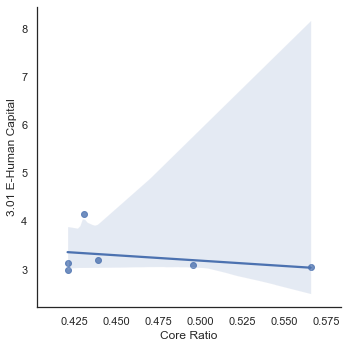

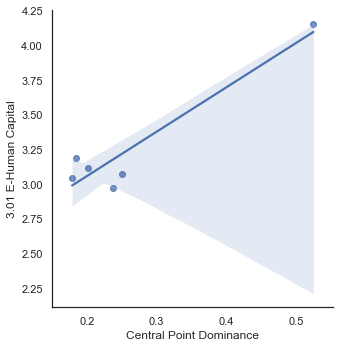

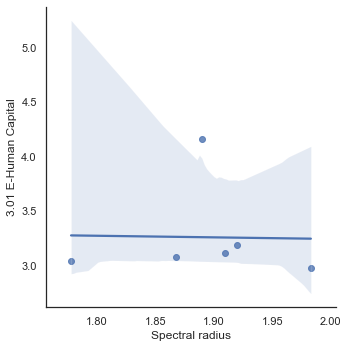

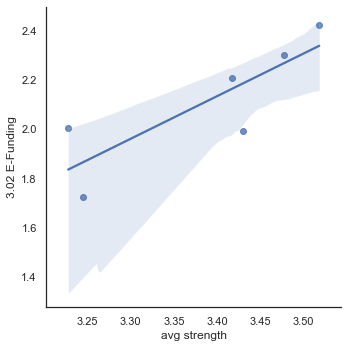

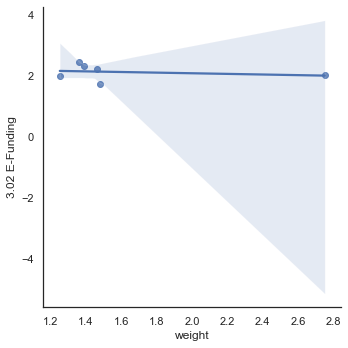

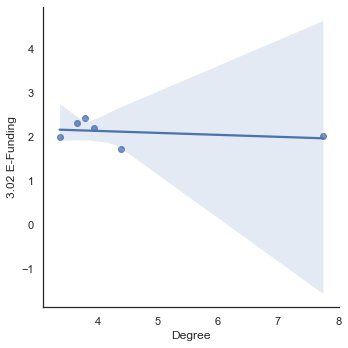

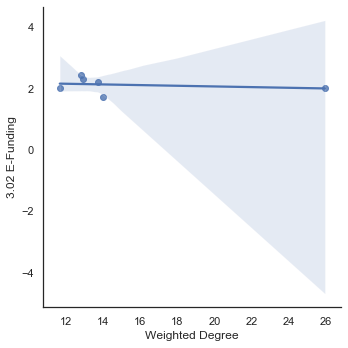

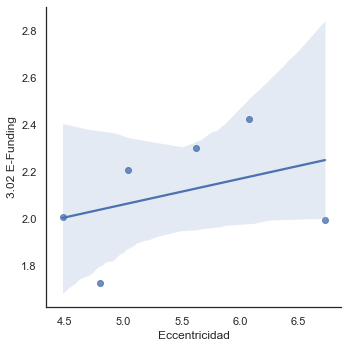

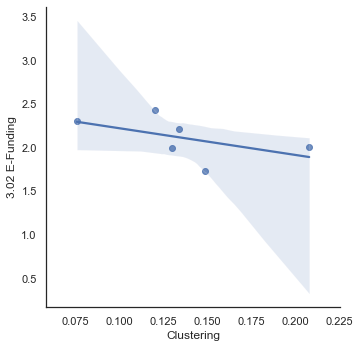

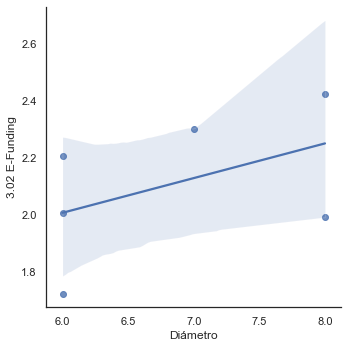

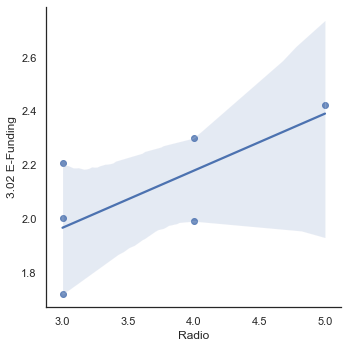

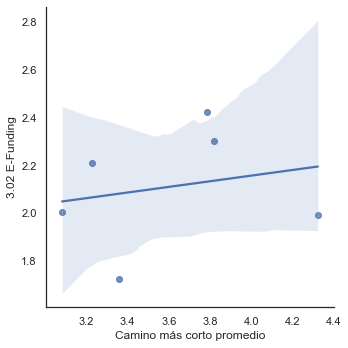

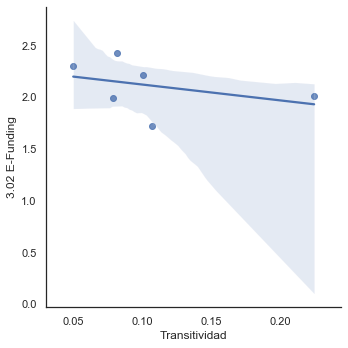

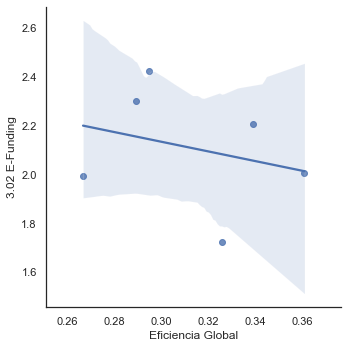

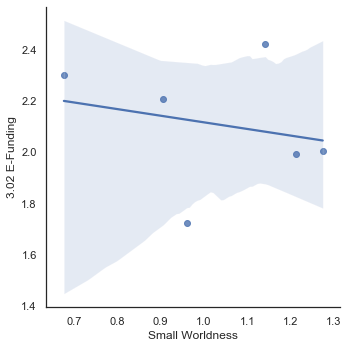

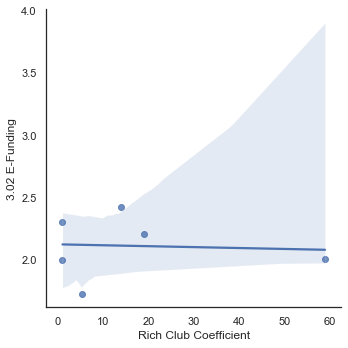

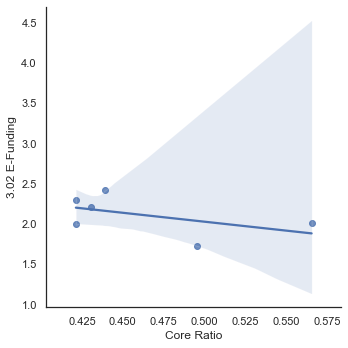

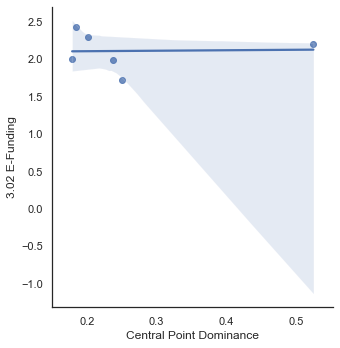

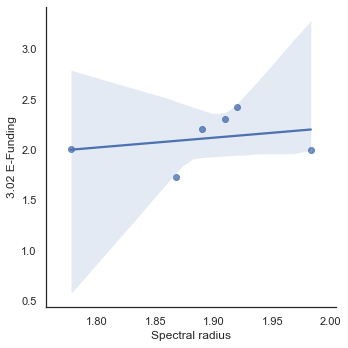

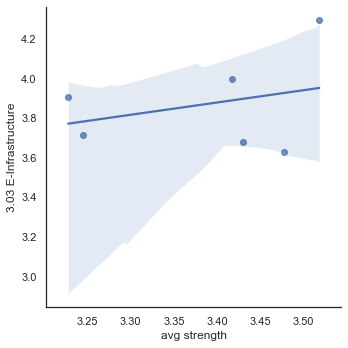

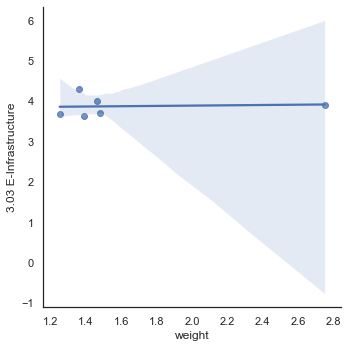

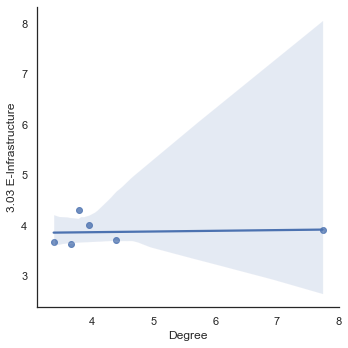

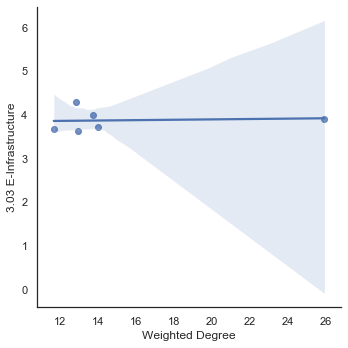

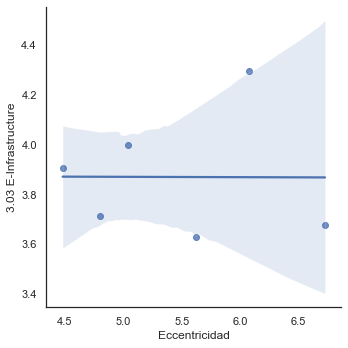

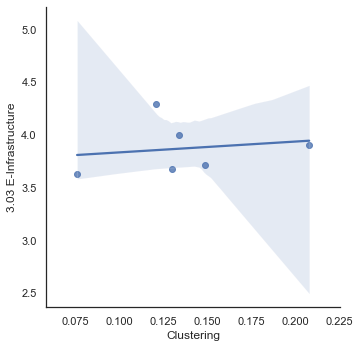

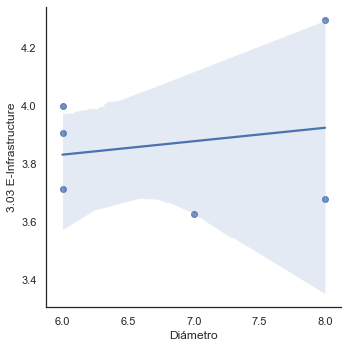

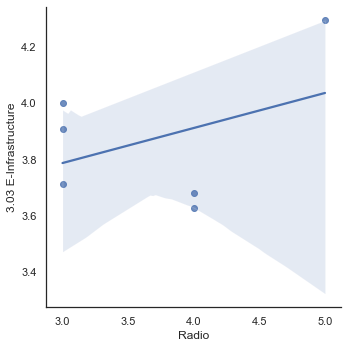

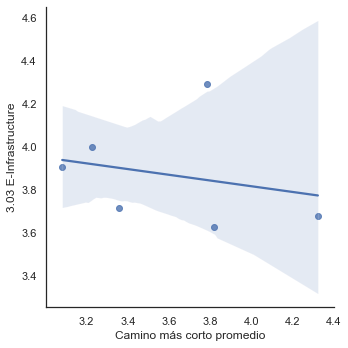

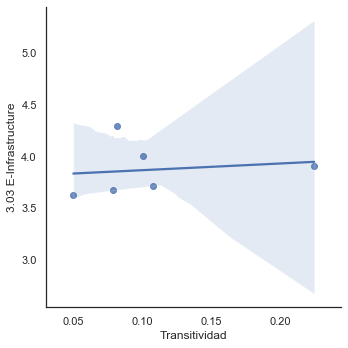

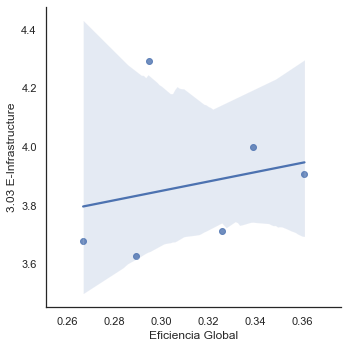

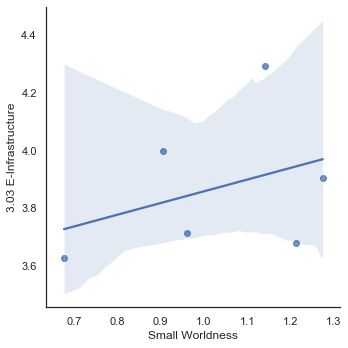

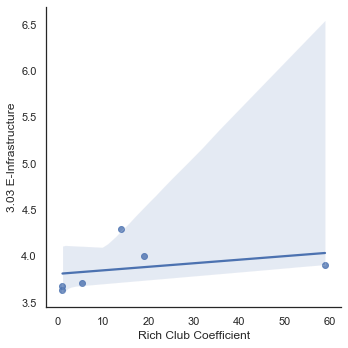

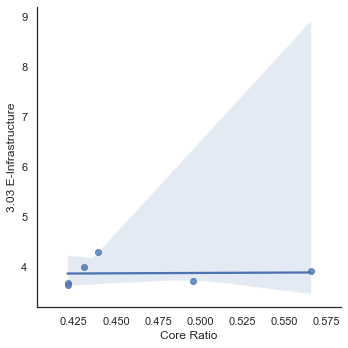

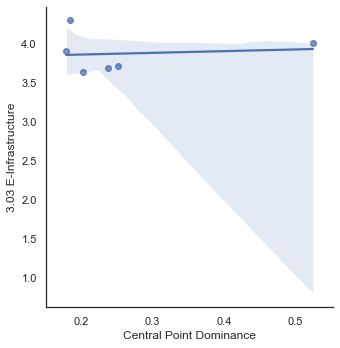

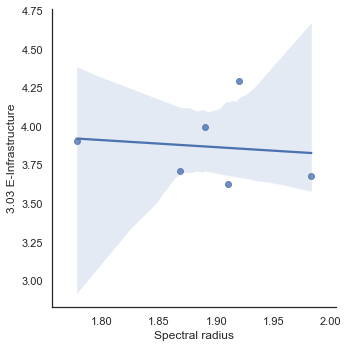

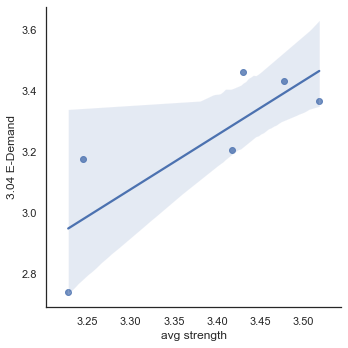

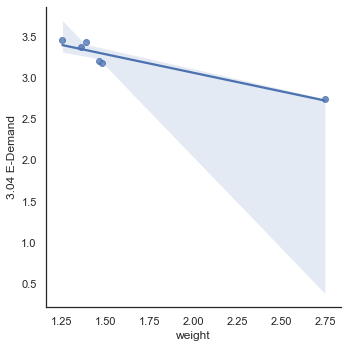

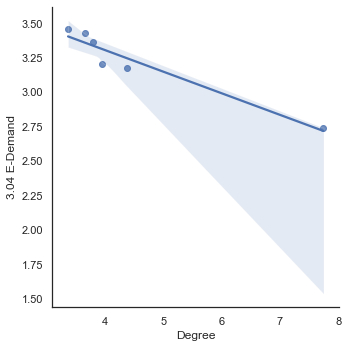

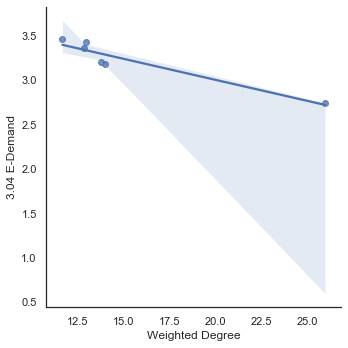

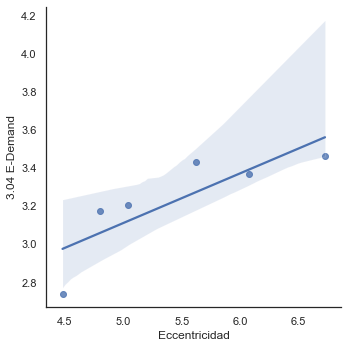

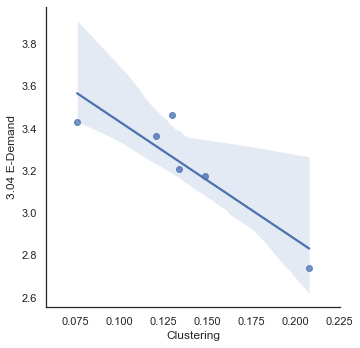

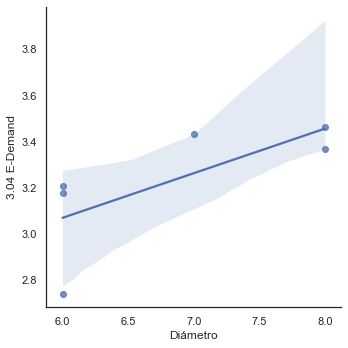

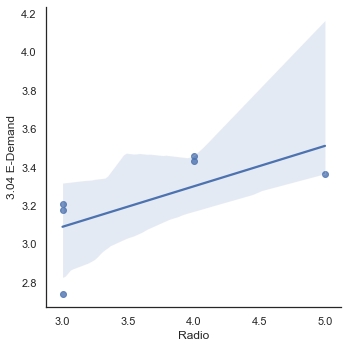

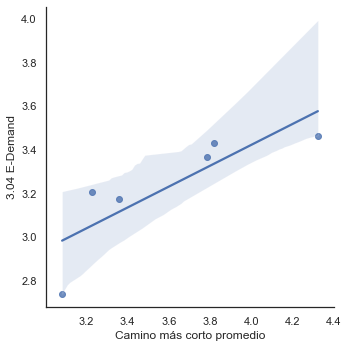

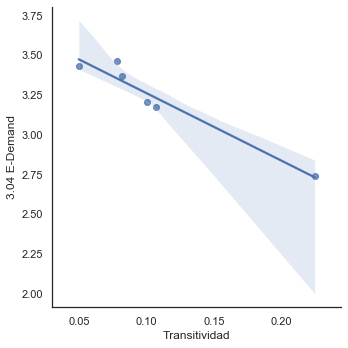

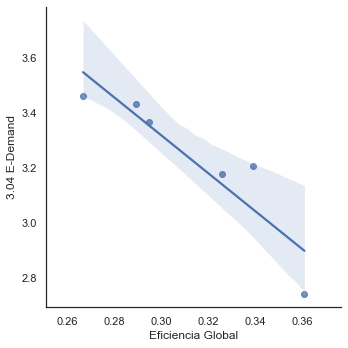

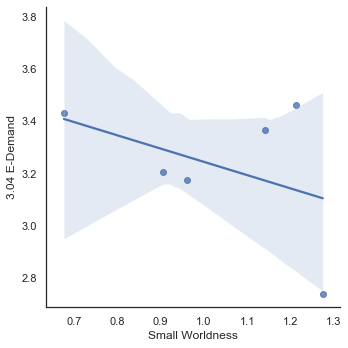

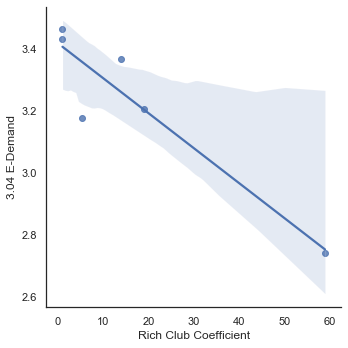

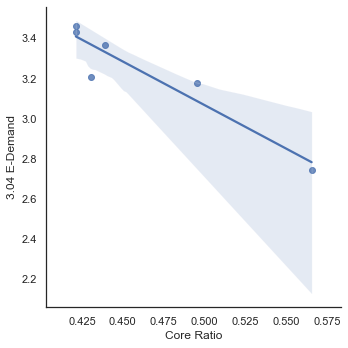

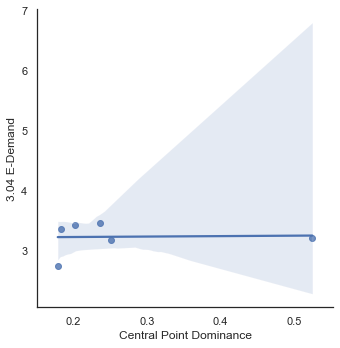

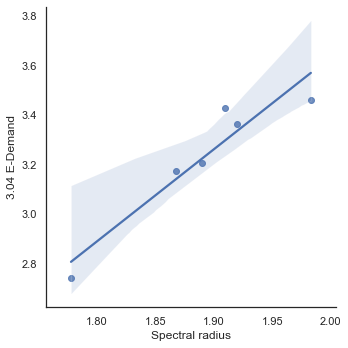

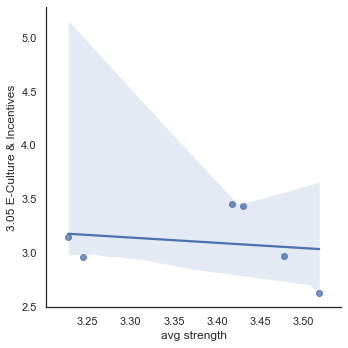

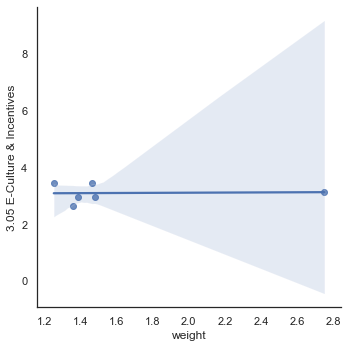

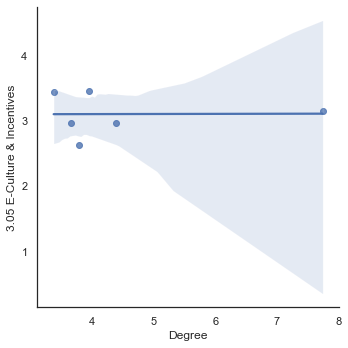

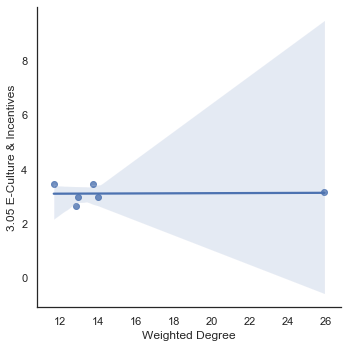

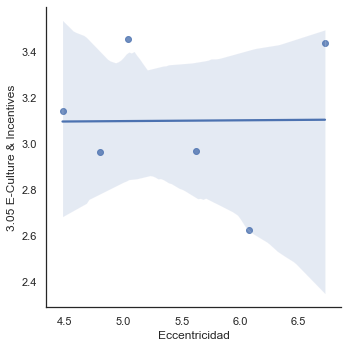

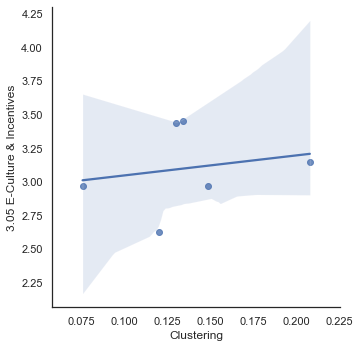

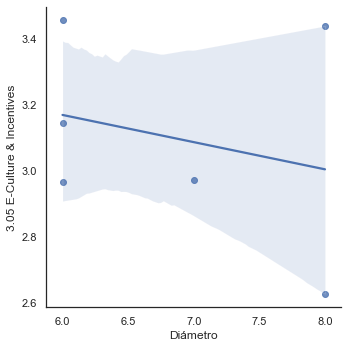

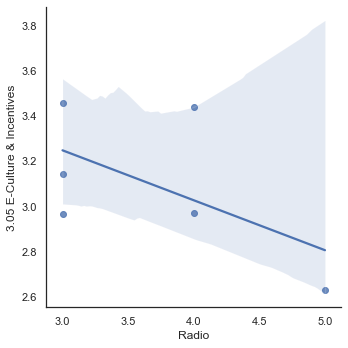

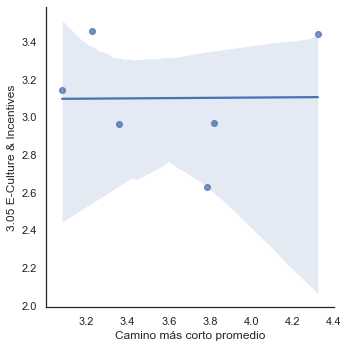

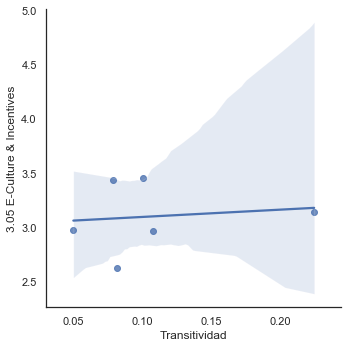

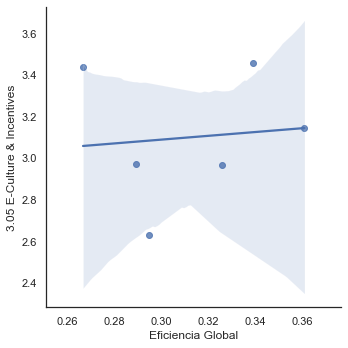

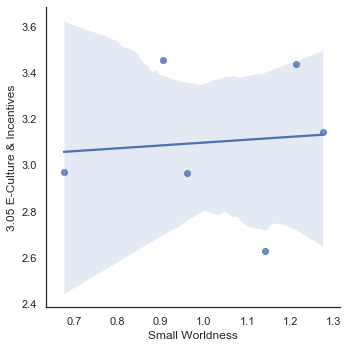

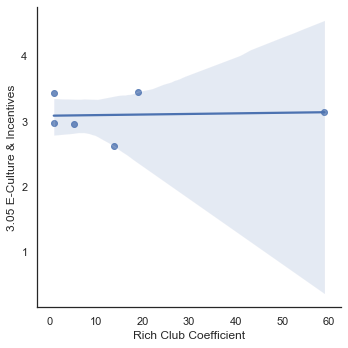

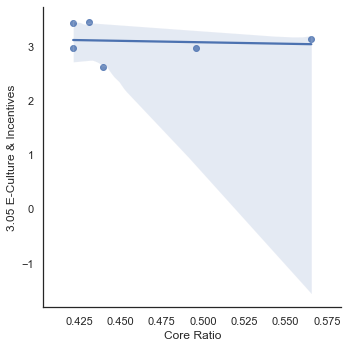

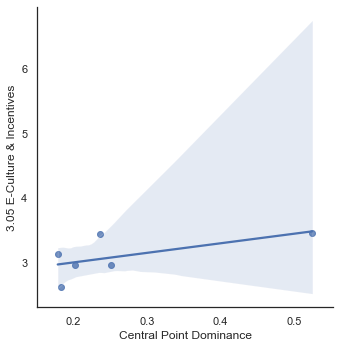

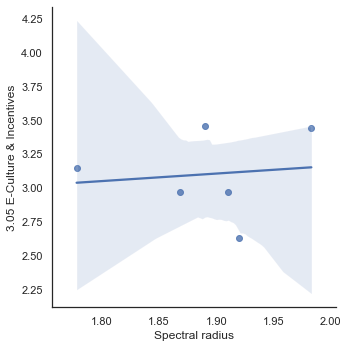

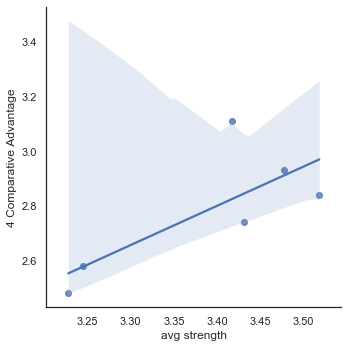

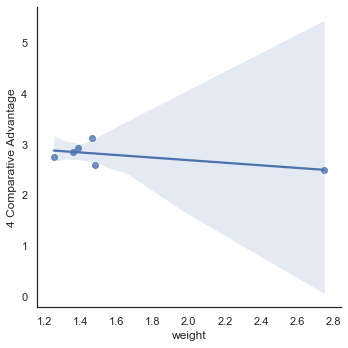

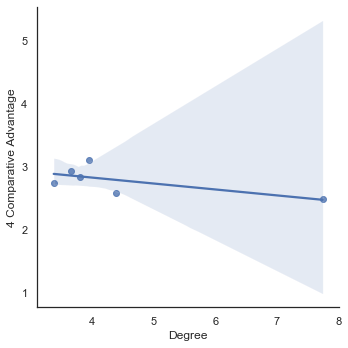

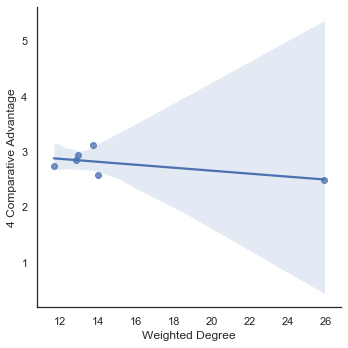

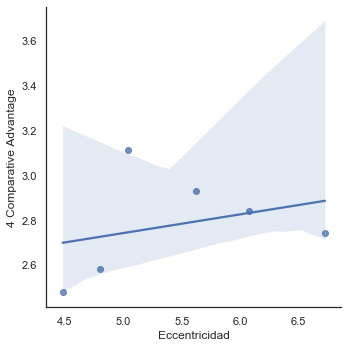

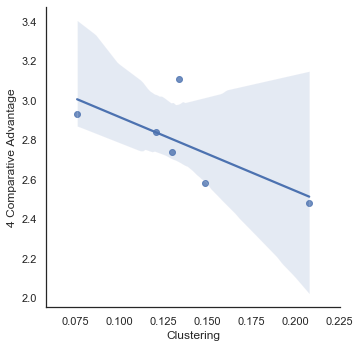

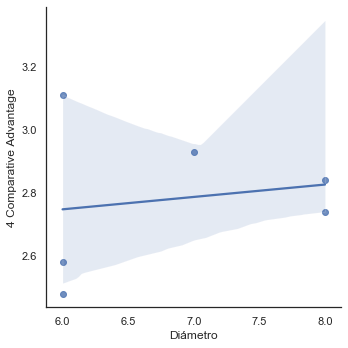

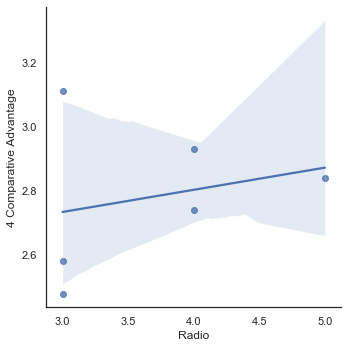

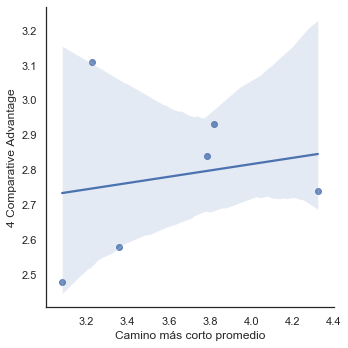

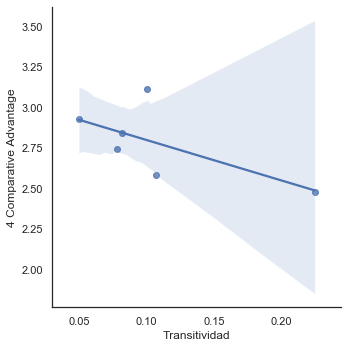

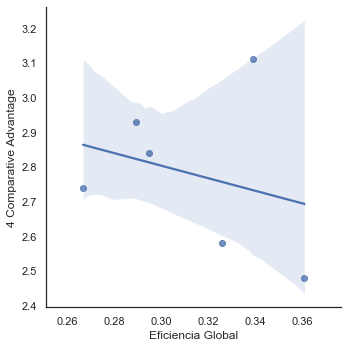

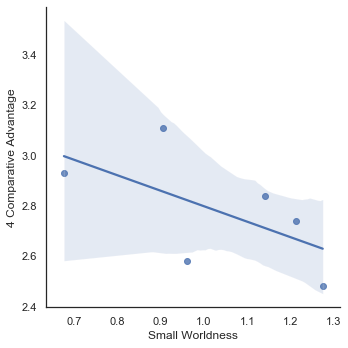

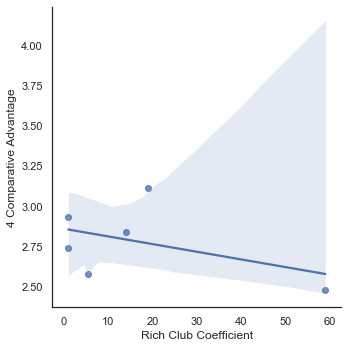

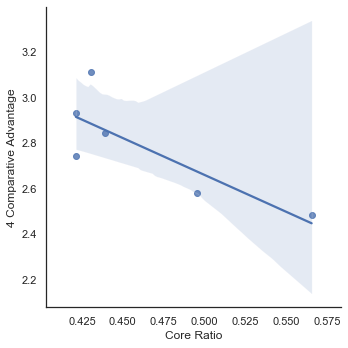

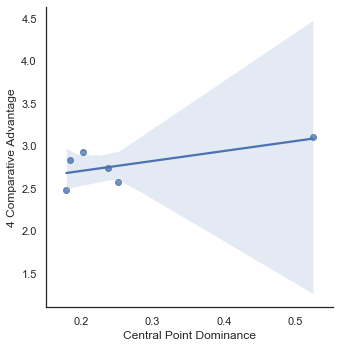

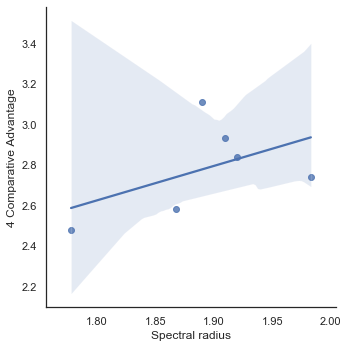

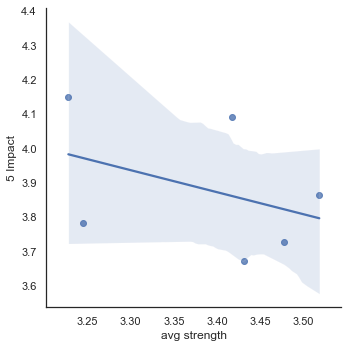

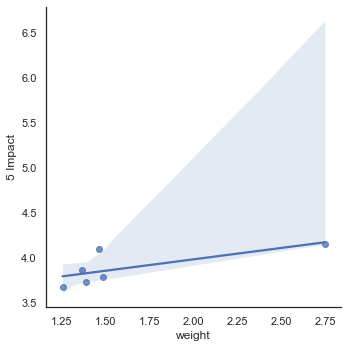

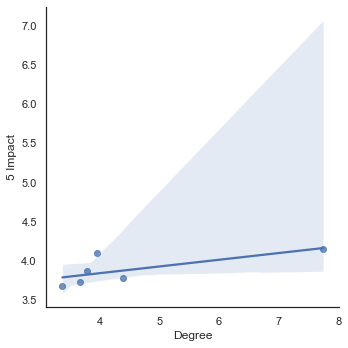

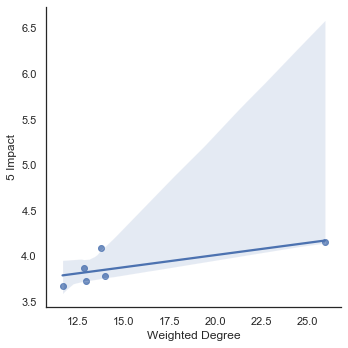

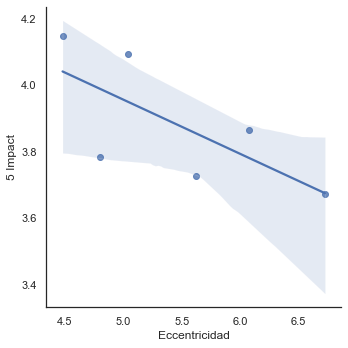

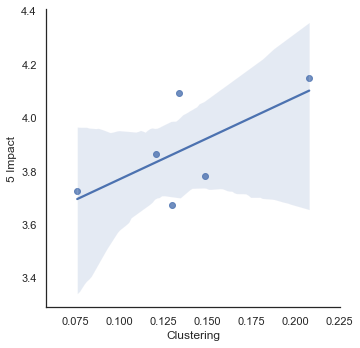

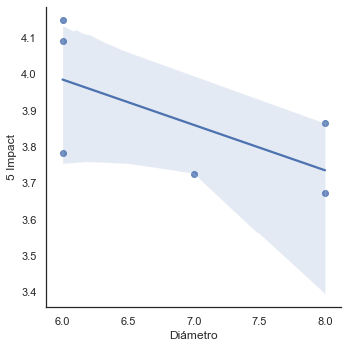

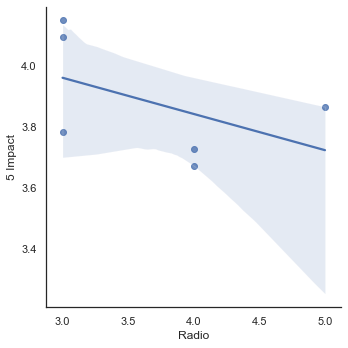

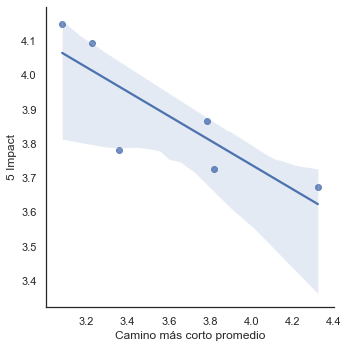

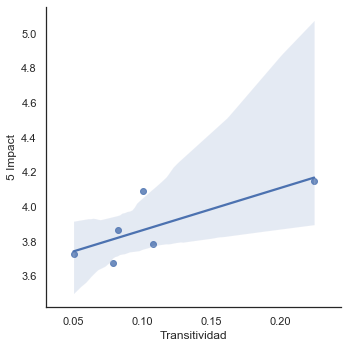

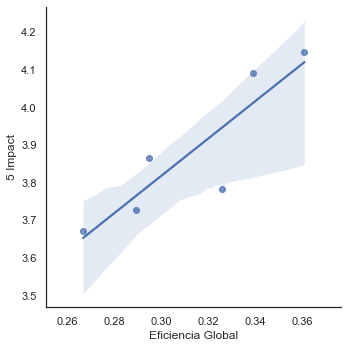

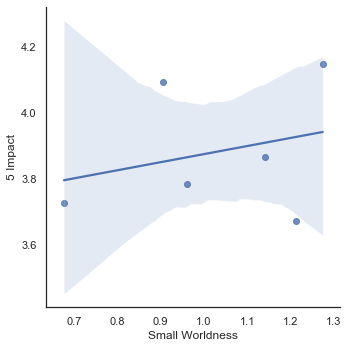

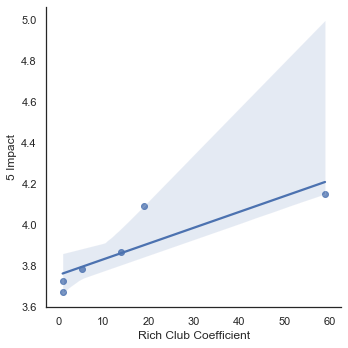

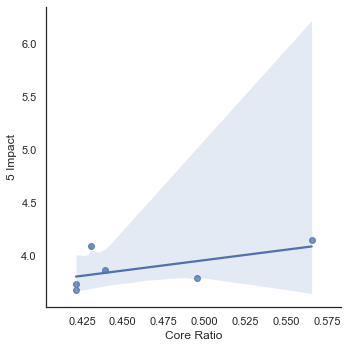

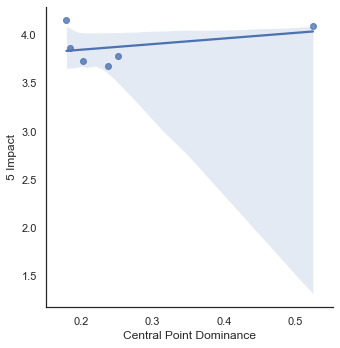

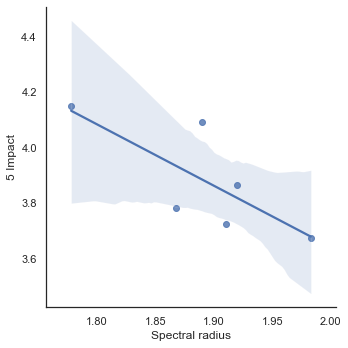

In [32]:
iecosystems_m=['1 Foundational Institutions', '2.01 I-Human Capital', '2.02 I-Funding', '2.03 I-Infrastructure', '2.04 I-Demand',
      '2.05 I-Culture & Incentives', '3.01 E-Human Capital', '3.02 E-Funding', '3.03 E-Infrastructure', '3.04 E-Demand', 
      '3.05 E-Culture & Incentives', '4 Comparative Advantage', '5 Impact']

global_m=['avg strength', 'weight', 'Degree', 'Weighted Degree', 'Eccentricidad', 'Clustering',
          'Diámetro', 'Radio', 'Camino más corto promedio', 'Transitividad', 'Eficiencia Global', 
          'Small Worldness', 'Rich Club Coefficient', 'Core Ratio', 'Central Point Dominance', 'Spectral radius']

significant_pairs=[]
for a in iecosystems_m:
  for b in global_m:
    if check_corr_significance(df_graph_ieco,a,b):
      significant_pairs.append((a,b))

significant_pairs


In [33]:
df_graph_ieco_with_detail = pd.concat([df_imputed,Graph_df], axis = 1)
df_graph_ieco_with_detail

1.01 Ease of doing business (WB)  1.02 Starting a business (WB)  \
México                                 3.90                           4.44   
Argentina                              3.36                           4.22   
Chile                                  3.90                           4.66   
Brasil                                 3.36                           4.25   
España                                 4.12                           4.48   
Uruguay                                3.46                           4.58   

           1.03 Paying taxes (WB)  1.04 Resolving Insolvency (WB)  \
México                       3.63                            3.81   
Argentina                    2.97                            2.60   
Chile                        4.01                            3.40   
Brasil                       2.38                            3.02   
España                       4.39                            4.17   
Uruguay                      3.81                            3.14   

           1.05 Enforcing contracts (WB)  1.06 Property Rights (IEF)  \
México                              3.68                        3.33   
Argentina                           3.30                        3.02   
Chile                               3.59                        3.80   
Brasil                              3.56                        3.29   
España                              3.84                        4.00   
Uruguay                             3.25                        3.88   

           1.07 Government Integrity (IEF)  1.08 Labor Freedom (IEF)  \
México                                2.47                      3.34   
Argentina                             2.99                      2.86   
Chile                                 3.94                      3.59   
Brasil                                2.82                      2.98   
España                                3.20                      3.31   
Uruguay                               3.94                      3.84   

           1.09 Trade freedom (IEF)  1.10 Corruption Perceptions Index (TI)  \
México                         4.50                                    2.12   
Argentina                      3.77                                    2.60   
Chile                          4.56                                    3.68   
Brasil                         3.71                                    2.40   
España                         4.46                                    3.32   
Uruguay                        4.10                                    3.80   

           2.01a Percentage of adults with a doctoral or equivalent level of education (OECD)  \
México                                              1.000000                                    
Argentina                                           1.343333                                    
Chile                                               1.343333                                    
Brasil                                              1.210000                                    
España                                              1.820000                                    
Uruguay                                             1.343333                                    

           2.01b Skillset of graduates (GCI 4.0)  \
México                                      3.06   
Argentina                                   3.12   
Chile                                       3.39   
Brasil                                      2.47   
España                                      3.32   
Uruguay                                     3.18   

           2.01c Ease of finding skilled employees (GCI 4.0)  \
México                                                  3.12   
Argentina                                               3.12   
Chile                                                   3.58   
Brasil                                                  2.59   
España                                             

In [35]:
i_funding_components = ['2.02a R&D expenditure as a % GDP (UNESCO)',
                       '2.02b R&D expenditure in \'000 current PPP$ (UNESCO)',
                       '2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO)',
                       '2.02d Business Expenditure as % of total R&D expenditure (UNESCO)']

e_funding_components = ['3.02a VC investment',
                       '3.02b Financing of SME\'s (GCI 4.0)',
                       '3.02c Venture Capital Availability (GCI 4.0)',
                       '3.02d Ease of Credit (GII)',
                       '3.02e VC deals (GII)',
                       '3.02f Venture Capital Deal Volume']

comparative_advantage_components = ['4.01 State of cluster development (GCI 4.0)',
                                   '4.02 Country capacity to attract and retain talent']

Correlation between:  2.02a R&D expenditure as a % GDP (UNESCO)   and   4.01 State of cluster development (GCI 4.0)
**********************************************
Pearson Correlation: 0.49033579393800975, p-value: 0.32344182817550426
Not significant
**********************************************

Correlation between:  2.02a R&D expenditure as a % GDP (UNESCO)   and   4.02 Country capacity to attract and retain talent
**********************************************
Pearson Correlation: -0.4336112783673308, p-value: 0.39034660571090496
Not significant
**********************************************

Correlation between:  2.02b R&D expenditure in '000 current PPP$ (UNESCO)   and   4.01 State of cluster development (GCI 4.0)
**********************************************
Pearson Correlation: 0.5083867759578267, p-value: 0.30311792551023975
Not significant
**********************************************

Correlation between:  2.02b R&D expenditure in '000 current PPP$ (UNESCO)   and   4.02 Cou

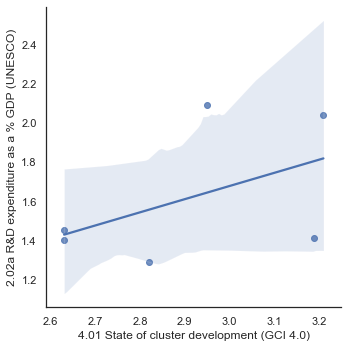

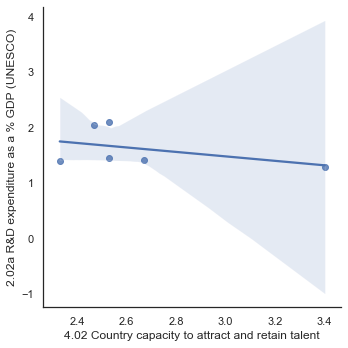

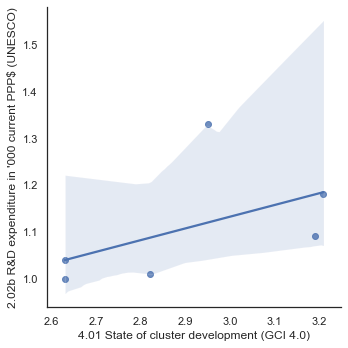

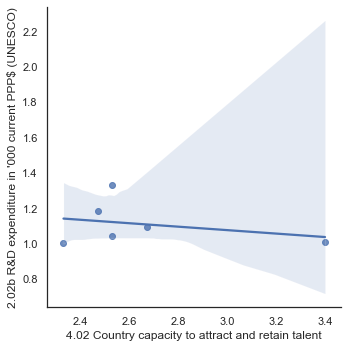

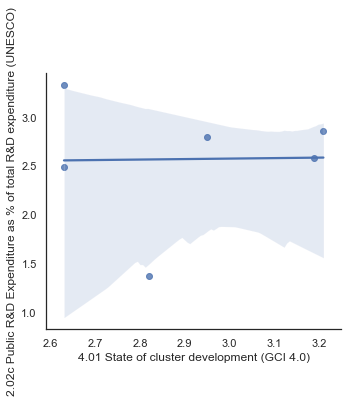

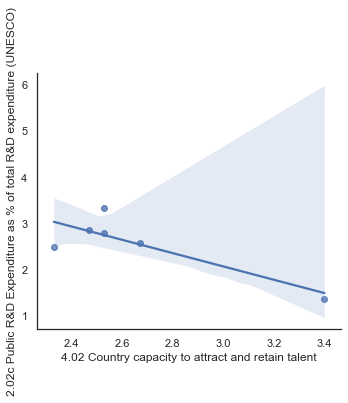

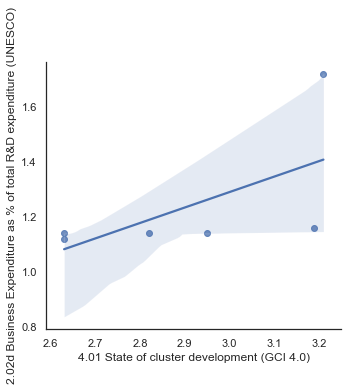

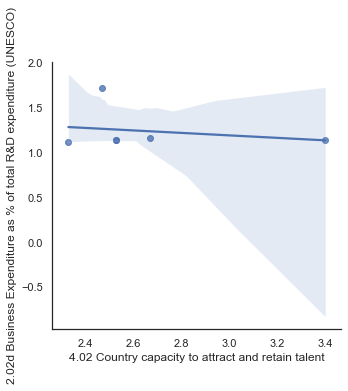

In [40]:
#correlations between I Funding and Comparative Advantage

significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

print(significant_positives)
print(significant_negatives)

Correlation between:  3.02a VC investment   and   4.01 State of cluster development (GCI 4.0)
**********************************************
Pearson Correlation: 0.710111362741228, p-value: 0.11387267603339613
Not significant
**********************************************

Correlation between:  3.02a VC investment   and   4.02 Country capacity to attract and retain talent
**********************************************
Pearson Correlation: 0.5288925865847713, p-value: 0.2806339857610456
Not significant
**********************************************

Correlation between:  3.02b Financing of SME's (GCI 4.0)   and   4.01 State of cluster development (GCI 4.0)
**********************************************
Pearson Correlation: 0.4474444844853924, p-value: 0.3736239352849416
Not significant
**********************************************

Correlation between:  3.02b Financing of SME's (GCI 4.0)   and   4.02 Country capacity to attract and retain talent
****************************************

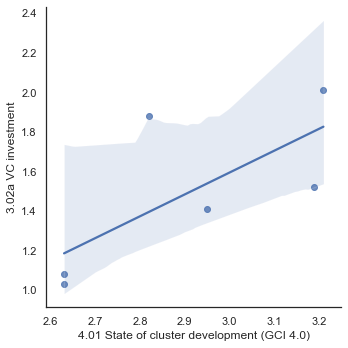

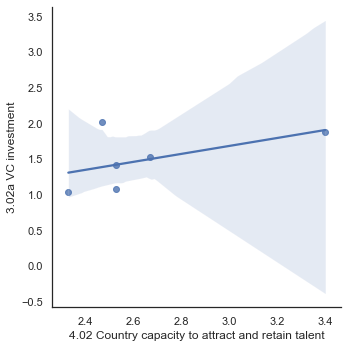

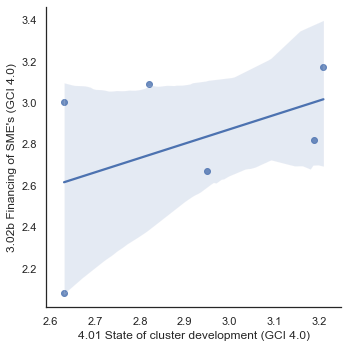

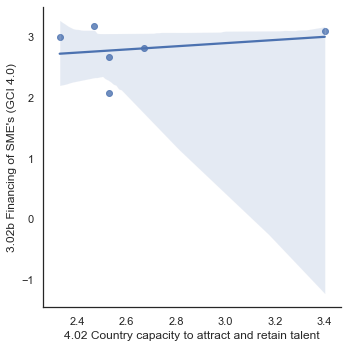

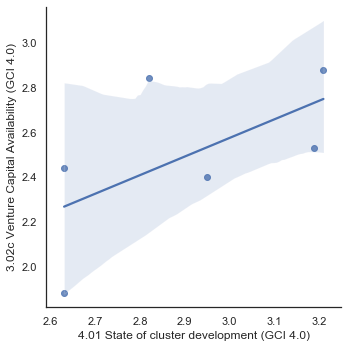

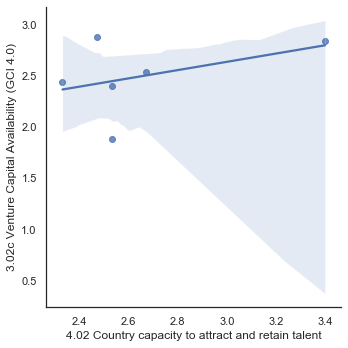

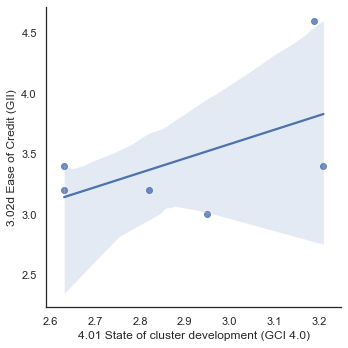

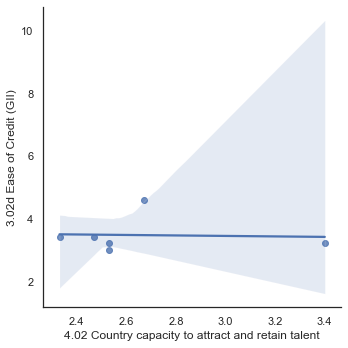

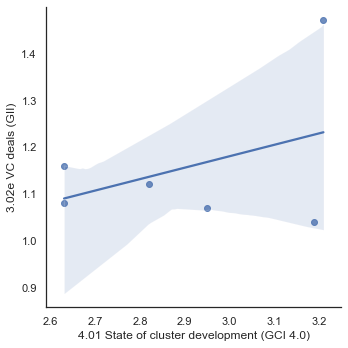

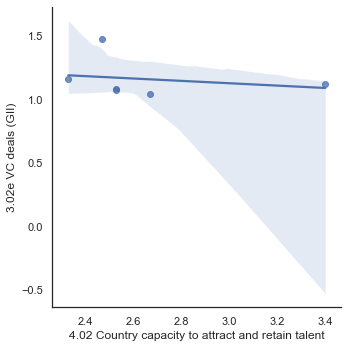

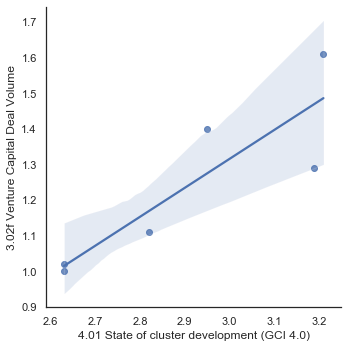

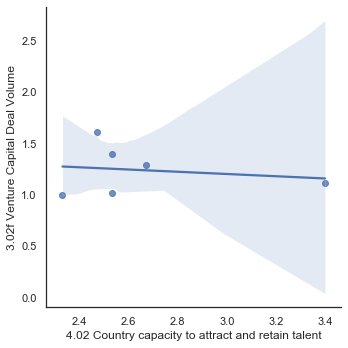

In [41]:
#correlations between I Funding and Comparative Advantage

significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

print(significant_positives)
print(significant_negatives)